In [1]:
import pandas as pd
import numpy as np
import utils as u
import matplotlib.pyplot as plt
import matplotlib

import altair as alt
import torch_utils as tu



## Looking at pipe0 results

In [2]:
# res_df1 = pd.read_csv('pipe0/res_df.tsv',sep='\t')
# res_df2 = pd.read_csv('pipe1/res_df.tsv',sep='\t')
# res_df = pd.concat([res_df1, res_df2]).reset_index()
res_df = pd.read_csv('pipe2/res_df.tsv',sep='\t')

In [3]:
res_df

model_desc model_type     lr  \
0           CNN32_lr0.01_SGD_rebalancedSampler_no_aug      CNN32  0.010   
1          CNN32_lr0.01_Adam_rebalancedSampler_no_aug      CNN32  0.010   
2       CNN32_lr0.01_Adagrad_rebalancedSampler_no_aug      CNN32  0.010   
3         CNN32_lr0.01_AdamW_rebalancedSampler_no_aug      CNN32  0.010   
4       CNN32_lr0.01_RMSprop_rebalancedSampler_no_aug      CNN32  0.010   
..                                                ...        ...    ...   
85  CNNLSTM_lr0.001_SGD_rebalancedSampler_mutation0.1    CNNLSTM  0.001   
86  CNNLSTM_lr0.001_Adam_rebalancedSampler_mutatio...    CNNLSTM  0.001   
87  CNNLSTM_lr0.001_Adagrad_rebalancedSampler_muta...    CNNLSTM  0.001   
88  CNNLSTM_lr0.001_AdamW_rebalancedSampler_mutati...    CNNLSTM  0.001   
89  CNNLSTM_lr0.001_RMSprop_rebalancedSampler_muta...    CNNLSTM  0.001   

        opt     sampler     data_aug  epoch_stop  best_val_loss       acc  \
0       SGD  rebalanced       no_aug         688       0.493245  0.878963   
1      Adam  rebalanced       no_aug        1889       0.420928  0.899135   
2   Adagrad  rebalanced       no_aug          59       0.429277  0.899135   
3     AdamW  rebalanced       no_aug         141       0.416548  0.902017   
4   RMSprop  rebalanced       no_aug         511       0.411276  0.902017   
..      ...         ...          ...         ...            ...       ...   
85      SGD  rebalanced  mutation0.1        2721       0.896654  0.717579   
86     Adam  rebalanced  mutation0.1           3       0.950434  0.708934   
87  Adagrad  rebalanced  mutation0.1           4       0.963478  0.697406   
88    AdamW  rebalanced  mutation0.1        2293       0.740517  0.853026   
89  RMSprop  rebalanced  mutation0.1           0       0.851199  0.878963   

         mcc      mi_p      mi_r     mi_f1      ma_p      ma_r     ma_f1  
0   0.011697  0.878963  0.878963  0.878963  0.342359  0.337638  0.332628  
1  -0.014945  0.899135  0.899135  0.899135  0.300578  0.332268  0.315630  
2  -0.014945  0.899135  0.899135  0.899135  0.300578  0.332268  0.315630  
3   0.000000  0.902017  0.902017  0.902017  0.300672  0.333333  0.316162  
4   0.000000  0.902017  0.902017  0.902017  0.300672  0.333333  0.316162  
..       ...       ...       ...       ...       ...       ...       ...  
85 -0.048558  0.717579  0.717579  0.717579  0.310655  0.290824  0.296664  
86 -0.028897  0.708934  0.708934  0.708934  0.324687  0.319897  0.313460  
87 -0.061015  0.697406  0.697406  0.697406  0.307980  0.283369  0.290240  
88  0.016213  0.853026  0.853026  0.853026  0.327277  0.328053  0.325791  
89  0.056323  0.878963  0.878963  0.878963  0.384826  0.350461  0.353395  

[90 rows x 16 columns]

In [4]:
alt.Chart(res_df).mark_bar().encode(
    x='model_desc:N',
    y='ma_f1:Q',
    color='model_type:N',
    #column='sampler:N'
)

alt.Chart(...)

In [13]:
alt.Chart(res_df).mark_point().encode(
    x='model_type:N',
    y='ma_f1:Q',
    color='data_aug:N',
    column='opt:N',
    detail='model_desc:N',
    shape="lr:N"
    
).interactive()

alt.Chart(...)

In [6]:
bal_res_df = res_df[res_df['sampler']=='rebalanced']

In [16]:

alt.Chart(bal_res_df).mark_point(size=100).encode(
    x='opt:N',
    y='ma_f1:Q',
    color='data_aug:N',
    column=alt.Column('model_type:N',header=alt.Header(labelFontSize=20)),
    detail='model_desc:N',
    shape="lr:N"
    
).configure_axis(
    labelFontSize=14,
    titleFontSize=20
).interactive()

alt.Chart(...)

In [18]:
alt.Chart(bal_res_df).mark_point().encode(
    x='data_aug:N',
    y='ma_f1:Q',
    color='data_aug:N',
    column='opt:N',
    detail='model_desc:N',
    shape="lr:N"
    
).interactive()

alt.Chart(...)

In [9]:
alt.Chart(res_df).mark_point().encode(
    x='data_aug:N',
    y='best_val_loss:Q',
    color='lr:N',
    column='model_type:N',
    detail='model_desc:N',
    shape="sampler:N"
    
).interactive()

alt.Chart(...)

In [25]:
alt.Chart(res_df).mark_point(size=100).encode(
    x='best_val_loss:Q',
    y='ma_f1:Q',
    color='opt:N',
    #column='model_type:N',
    detail='model_desc:N',
    shape="data_aug:N",
    tooltip=['model_type:N','data_aug:N','opt:N','lr:Q']
    
).interactive()

alt.Chart(...)

In [27]:
alt.Chart(bal_res_df).mark_point().encode(
    x='acc:Q',
    y='ma_f1:Q',
    color='opt:N',
    column='lr:N',
    detail='model_desc:N',
    shape="data_aug:N"
    
).interactive()

alt.Chart(...)

In [12]:
alt.Chart(bal_res_df).mark_point(size=100).encode(
    x='best_val_loss:Q',
    y='ma_f1:Q',
    color='model_type:N',
    column='data_aug:N',
    detail='model_desc:N',
    shape="lr:N"
    
).interactive()

alt.Chart(...)

# check into loss trajectories

In [28]:
# loss_dict1 = np.load('pipe0/loss_dict.npy',allow_pickle=True).item()
# loss_dict2 = np.load('pipe1/loss_dict.npy',allow_pickle=True).item()

# loss_dict = {}
# loss_dict.update(loss_dict1)
# loss_dict.update(loss_dict2)

loss_dict = np.load('pipe2/loss_dict.npy',allow_pickle=True).item()

In [29]:
loss_dict.keys()

dict_keys(['CNN32_lr0.01_SGD_rebalancedSampler_no_aug', 'CNN32_lr0.01_Adam_rebalancedSampler_no_aug', 'CNN32_lr0.01_Adagrad_rebalancedSampler_no_aug', 'CNN32_lr0.01_AdamW_rebalancedSampler_no_aug', 'CNN32_lr0.01_RMSprop_rebalancedSampler_no_aug', 'LSTM_lr0.01_SGD_rebalancedSampler_no_aug', 'LSTM_lr0.01_Adam_rebalancedSampler_no_aug', 'LSTM_lr0.01_Adagrad_rebalancedSampler_no_aug', 'LSTM_lr0.01_AdamW_rebalancedSampler_no_aug', 'LSTM_lr0.01_RMSprop_rebalancedSampler_no_aug', 'CNNLSTM_lr0.01_SGD_rebalancedSampler_no_aug', 'CNNLSTM_lr0.01_Adam_rebalancedSampler_no_aug', 'CNNLSTM_lr0.01_Adagrad_rebalancedSampler_no_aug', 'CNNLSTM_lr0.01_AdamW_rebalancedSampler_no_aug', 'CNNLSTM_lr0.01_RMSprop_rebalancedSampler_no_aug', 'CNN32_lr0.001_SGD_rebalancedSampler_no_aug', 'CNN32_lr0.001_Adam_rebalancedSampler_no_aug', 'CNN32_lr0.001_Adagrad_rebalancedSampler_no_aug', 'CNN32_lr0.001_AdamW_rebalancedSampler_no_aug', 'CNN32_lr0.001_RMSprop_rebalancedSampler_no_aug', 'LSTM_lr0.001_SGD_rebalancedSampler

In [30]:
def quick_loss_plot(data_label_list,title,loss_type="MSE Loss",sparse_n=0):
    '''
    For each train/test loss trajectory, plot loss by epoch
    '''
    for i,((train_data,test_data),label,epoch_stop,best_val) in enumerate(data_label_list):
        # plot only 1 in every sparse_n points
        if sparse_n:
            train_data = [x for i,x in enumerate(train_data) if (i%sparse_n==0)]
            test_data = [x for i,x in enumerate(test_data) if (i%sparse_n==0)]
            epoch_stop = epoch_stop/sparse_n
            
        plt.plot(train_data,linestyle='--', label=f"{label} Train")
        plt.plot(test_data, label=f"{label} Test",linewidth=3.0)
        plt.axvline(x=epoch_stop,c="k",linestyle='dotted')
        plt.axhline(y=best_val,c="k",linestyle='dotted')

    plt.legend()
    plt.ylabel(loss_type)
    plt.xlabel("Epoch")
    plt.title(f"{title}")
    plt.legend(bbox_to_anchor=(1,1),loc='upper left')
    plt.show()
    

def quick_loss_plot2(data_label_list,loss_type="Cross Entropy Loss",sparse_n=0, coff=0):
    '''
    For each train/test loss trajectory, plot loss by epoch
    '''
    #plt.set_cmap("tab20")
    colors =  matplotlib.cm.get_cmap("tab20").colors

    for i,((train_data,test_data),label,epoch_stop,best_val) in enumerate(data_label_list):
        # plot only 1 in every sparse_n points
        if sparse_n:
            train_data = [x for i,x in enumerate(train_data) if (i%sparse_n==0)]
            test_data = [x for i,x in enumerate(test_data) if (i%sparse_n==0)]
            epoch_stop = epoch_stop/sparse_n
        
        ctrain = colors[2*i+1+coff]
        ctest = colors[2*i+coff]
        plt.plot(train_data,linestyle='--',c=ctrain, label=f"{label} Train")
        plt.plot(test_data, c=ctest, label=f"{label} Test",linewidth=3.0)
        plt.axvline(x=epoch_stop,c=ctest,linestyle='dotted')
        plt.axhline(y=best_val,c=ctest,linestyle='dotted')

    plt.legend()
    plt.ylabel(loss_type)
    plt.xlabel("Epoch")
    #plt.title(f"{title}")
    plt.legend(bbox_to_anchor=(1,1),loc='upper left')
    
    plt.show()

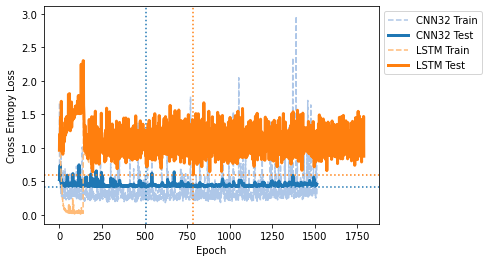

In [32]:
ms = ['CNN32_lr0.01_SGD_rebalancedSampler_no_aug','LSTM_lr0.01_AdamW_rebalancedSampler_mutation0.1']

traces = []
for m in ms:
    data_label = loss_dict[m]['data_label'][0]
    traces.append(data_label)

quick_loss_plot2(traces)

In [33]:
res_df[res_df['model_desc'].isin(ms)]

model_desc model_type    lr    opt  \
0         CNN32_lr0.01_SGD_rebalancedSampler_no_aug      CNN32  0.01    SGD   
68  LSTM_lr0.01_AdamW_rebalancedSampler_mutation0.1       LSTM  0.01  AdamW   

       sampler     data_aug  epoch_stop  best_val_loss       acc       mcc  \
0   rebalanced       no_aug         688       0.493245  0.878963  0.011697   
68  rebalanced  mutation0.1           8       0.797752  0.766571 -0.004441   

        mi_p      mi_r     mi_f1      ma_p      ma_r     ma_f1  
0   0.878963  0.878963  0.878963  0.342359  0.337638  0.332628  
68  0.766571  0.766571  0.766571  0.329640  0.321752  0.324290

In [34]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,precision_recall_curve


In [36]:
for m in ms:
    train_f = f'pipe2/conf_dfs/{m}_train_conf_df.tsv'
    val_f = f'pipe2/conf_dfs/{m}_val_conf_df.tsv'
    train_df = pd.read_csv(train_f,sep='\t')
    val_df = pd.read_csv(val_f,sep='\t')

    train_f1 = f1_score(train_df['truth'].values,train_df['pred'].values,labels=[0,1,2],average="macro")
    val_f1 = f1_score(val_df['truth'].values,val_df['pred'].values,labels=[0,1,2],average="macro")
    
    print(m)
    print(train_f1)
    print(val_f1)
    print()

CNN32_lr0.01_SGD_rebalancedSampler_no_aug
0.9868344692518605
0.3326282051282051

LSTM_lr0.01_AdamW_rebalancedSampler_mutation0.1
0.774773859116515
0.32428992115512495



TITLE: CNN32_lr0.01_SGD_rebalancedSampler_no_aug


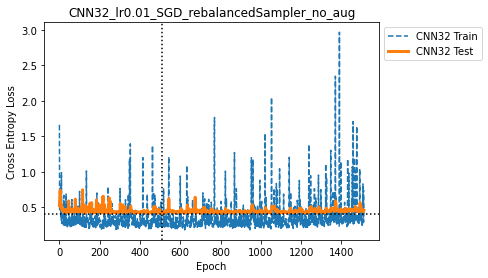

TITLE: CNN32_lr0.01_Adam_rebalancedSampler_no_aug


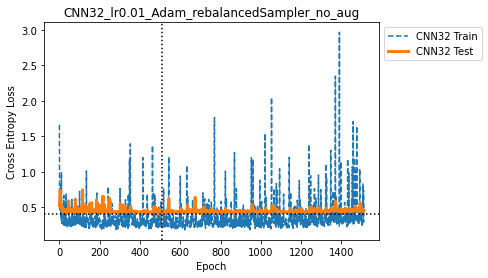

TITLE: CNN32_lr0.01_Adagrad_rebalancedSampler_no_aug


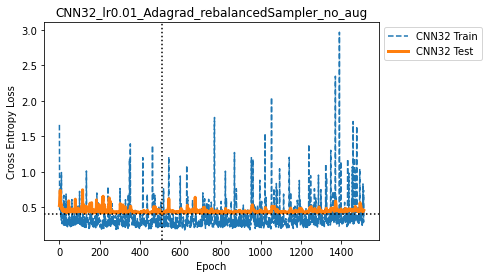

TITLE: CNN32_lr0.01_AdamW_rebalancedSampler_no_aug


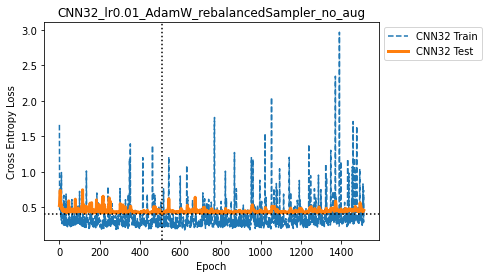

TITLE: CNN32_lr0.01_RMSprop_rebalancedSampler_no_aug


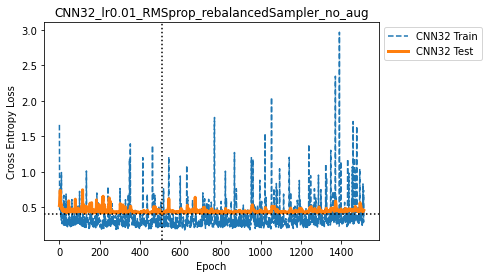

TITLE: LSTM_lr0.01_SGD_rebalancedSampler_no_aug


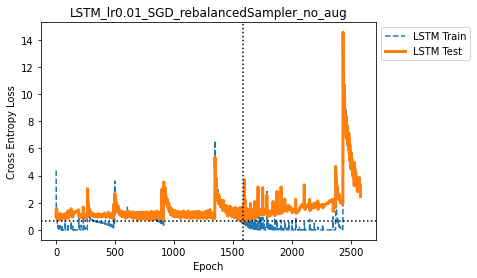

TITLE: LSTM_lr0.01_Adam_rebalancedSampler_no_aug


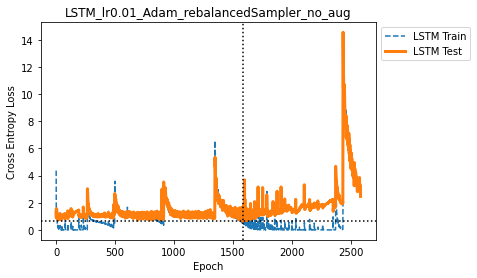

TITLE: LSTM_lr0.01_Adagrad_rebalancedSampler_no_aug


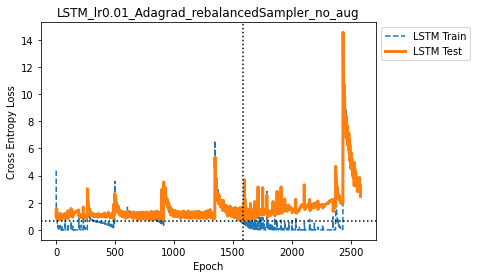

TITLE: LSTM_lr0.01_AdamW_rebalancedSampler_no_aug


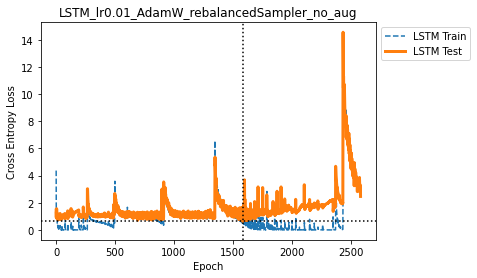

TITLE: LSTM_lr0.01_RMSprop_rebalancedSampler_no_aug


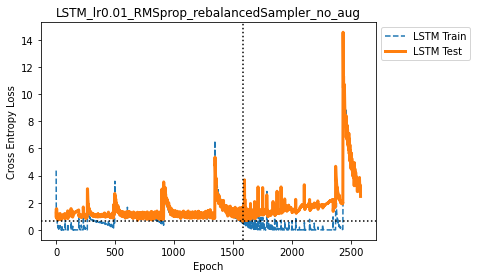

TITLE: CNNLSTM_lr0.01_SGD_rebalancedSampler_no_aug


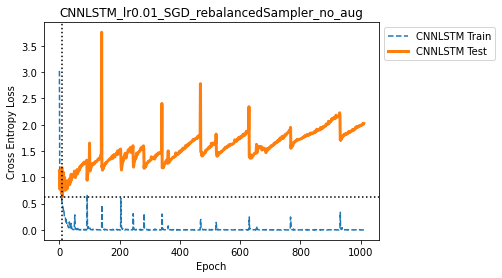

TITLE: CNNLSTM_lr0.01_Adam_rebalancedSampler_no_aug


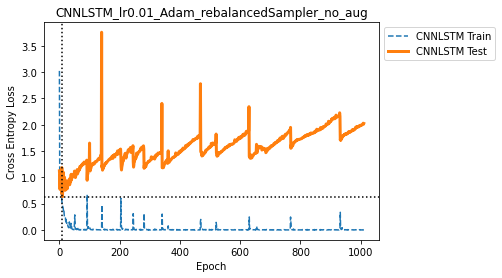

TITLE: CNNLSTM_lr0.01_Adagrad_rebalancedSampler_no_aug


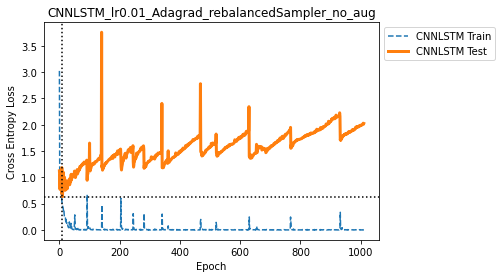

TITLE: CNNLSTM_lr0.01_AdamW_rebalancedSampler_no_aug


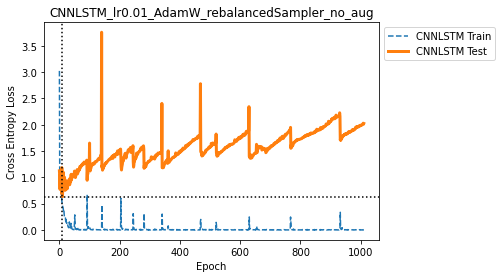

TITLE: CNNLSTM_lr0.01_RMSprop_rebalancedSampler_no_aug


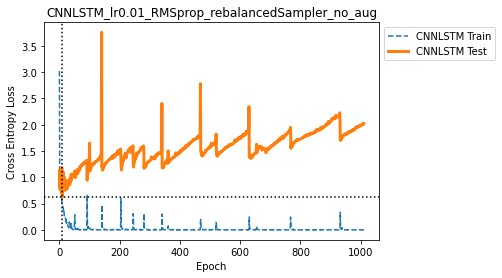

TITLE: CNN32_lr0.001_SGD_rebalancedSampler_no_aug


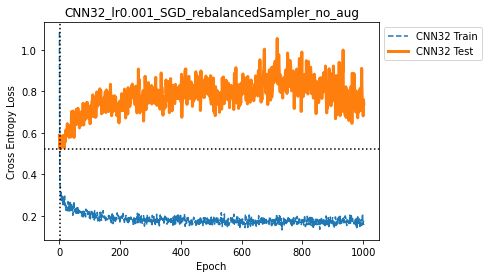

TITLE: CNN32_lr0.001_Adam_rebalancedSampler_no_aug


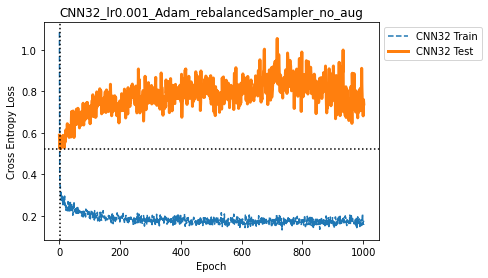

TITLE: CNN32_lr0.001_Adagrad_rebalancedSampler_no_aug


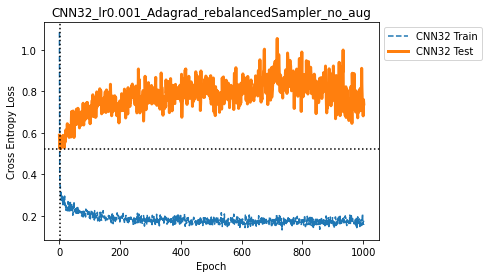

TITLE: CNN32_lr0.001_AdamW_rebalancedSampler_no_aug


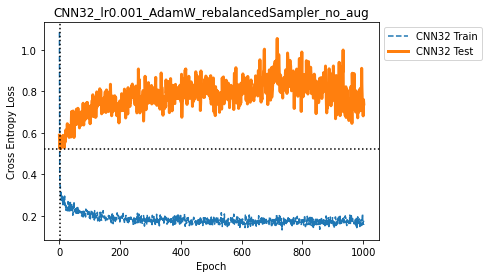

TITLE: CNN32_lr0.001_RMSprop_rebalancedSampler_no_aug


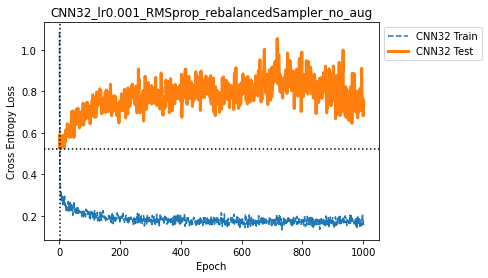

TITLE: LSTM_lr0.001_SGD_rebalancedSampler_no_aug


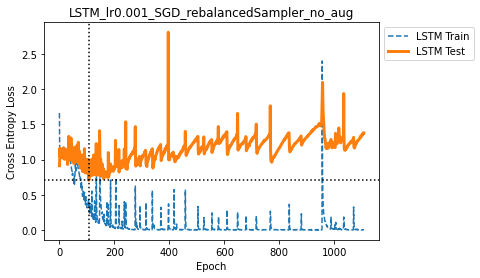

TITLE: LSTM_lr0.001_Adam_rebalancedSampler_no_aug


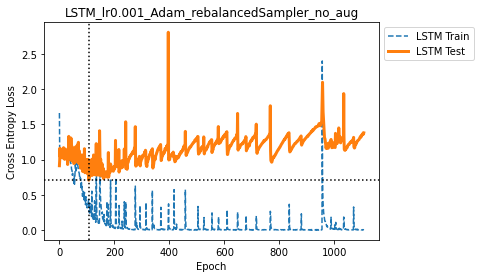

TITLE: LSTM_lr0.001_Adagrad_rebalancedSampler_no_aug


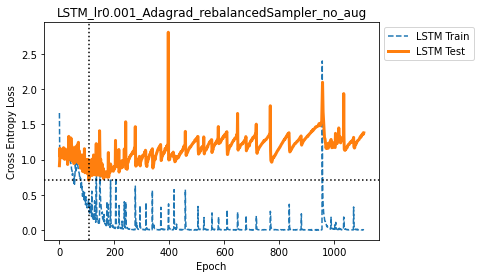

TITLE: LSTM_lr0.001_AdamW_rebalancedSampler_no_aug


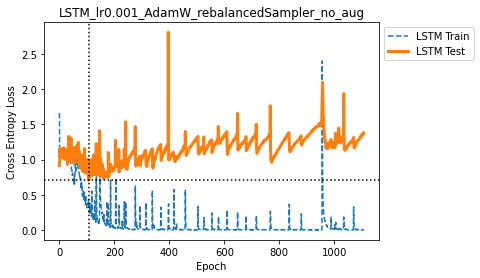

TITLE: LSTM_lr0.001_RMSprop_rebalancedSampler_no_aug


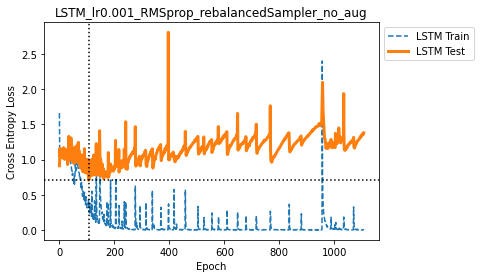

TITLE: CNNLSTM_lr0.001_SGD_rebalancedSampler_no_aug


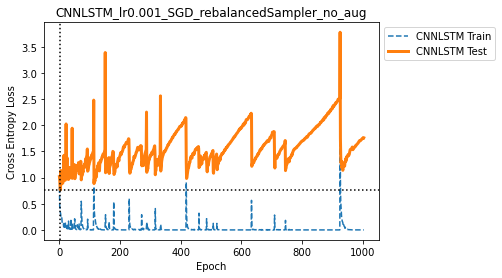

TITLE: CNNLSTM_lr0.001_Adam_rebalancedSampler_no_aug


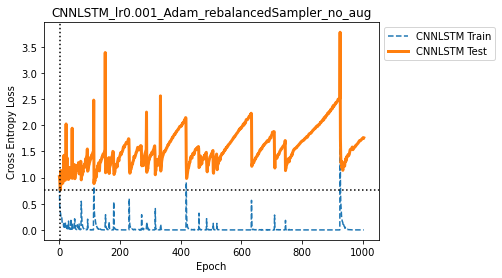

TITLE: CNNLSTM_lr0.001_Adagrad_rebalancedSampler_no_aug


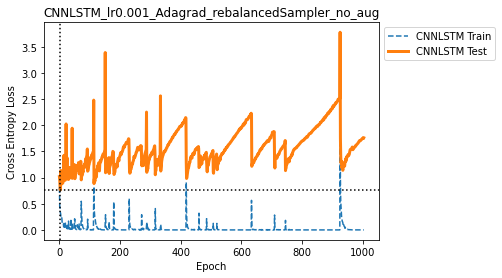

TITLE: CNNLSTM_lr0.001_AdamW_rebalancedSampler_no_aug


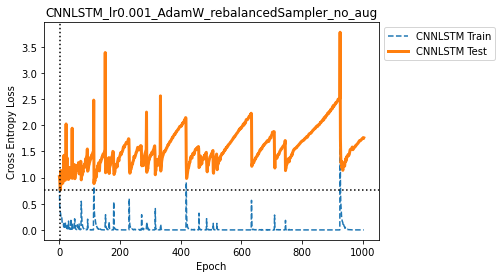

TITLE: CNNLSTM_lr0.001_RMSprop_rebalancedSampler_no_aug


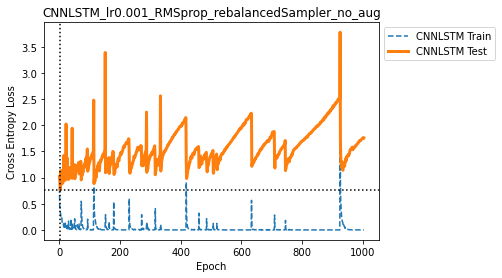

TITLE: CNN32_lr0.01_SGD_rebalancedSampler_revslide50


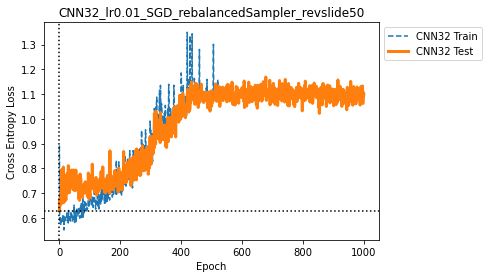

TITLE: CNN32_lr0.01_Adam_rebalancedSampler_revslide50


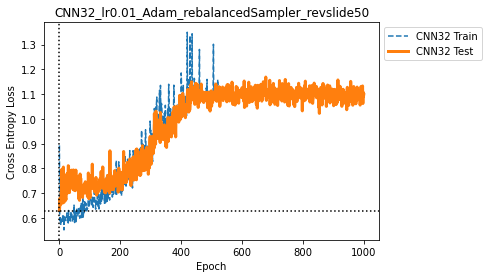

TITLE: CNN32_lr0.01_Adagrad_rebalancedSampler_revslide50


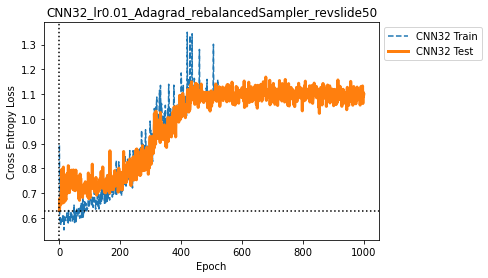

TITLE: CNN32_lr0.01_AdamW_rebalancedSampler_revslide50


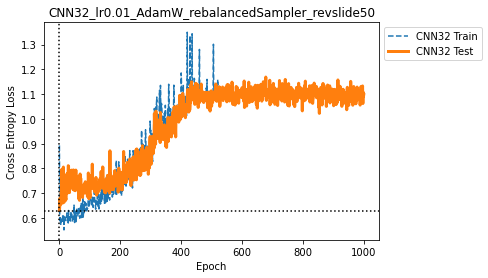

TITLE: CNN32_lr0.01_RMSprop_rebalancedSampler_revslide50


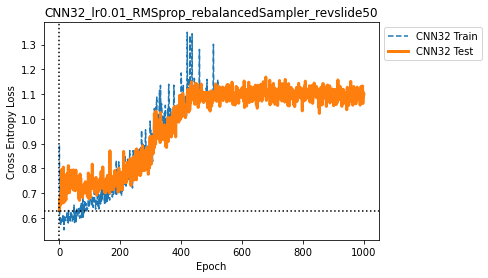

TITLE: LSTM_lr0.01_SGD_rebalancedSampler_revslide50


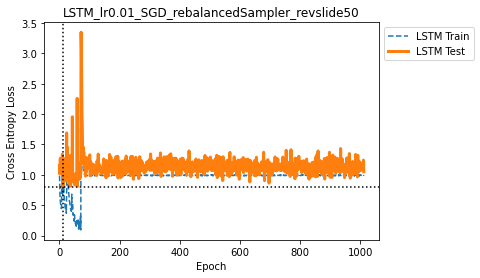

TITLE: LSTM_lr0.01_Adam_rebalancedSampler_revslide50


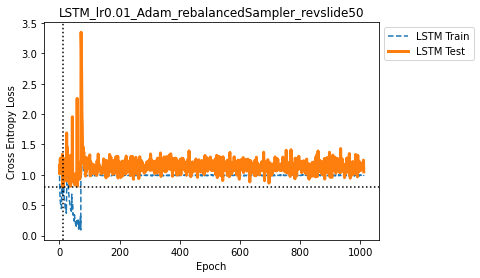

TITLE: LSTM_lr0.01_Adagrad_rebalancedSampler_revslide50


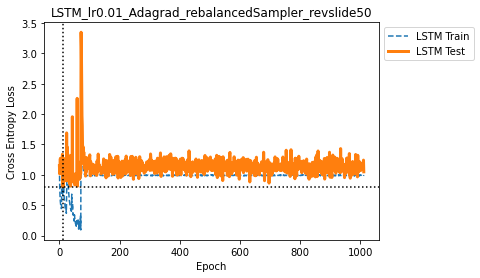

TITLE: LSTM_lr0.01_AdamW_rebalancedSampler_revslide50


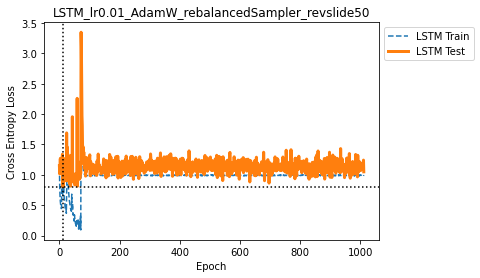

TITLE: LSTM_lr0.01_RMSprop_rebalancedSampler_revslide50


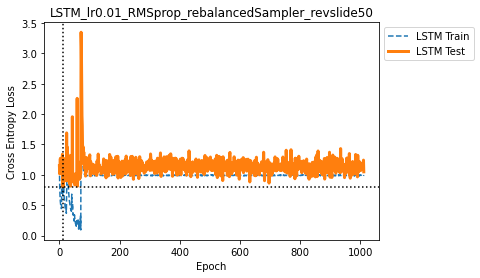

TITLE: CNNLSTM_lr0.01_SGD_rebalancedSampler_revslide50


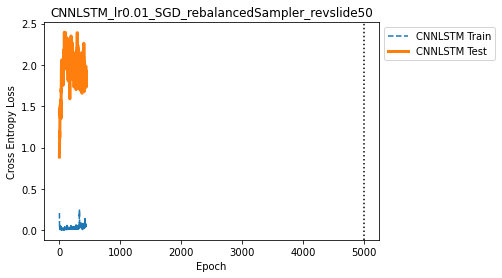

TITLE: CNNLSTM_lr0.01_Adam_rebalancedSampler_revslide50


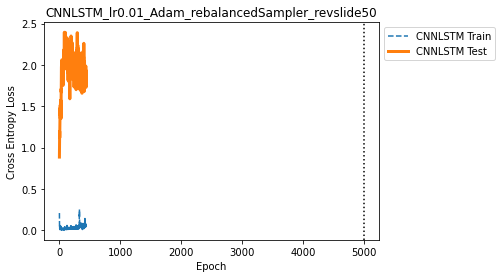

TITLE: CNNLSTM_lr0.01_Adagrad_rebalancedSampler_revslide50


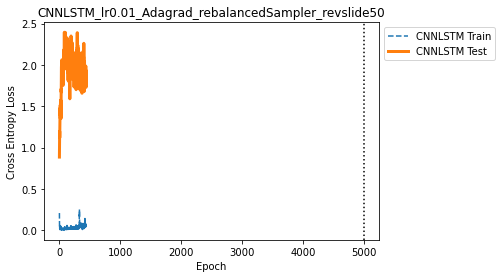

TITLE: CNNLSTM_lr0.01_AdamW_rebalancedSampler_revslide50


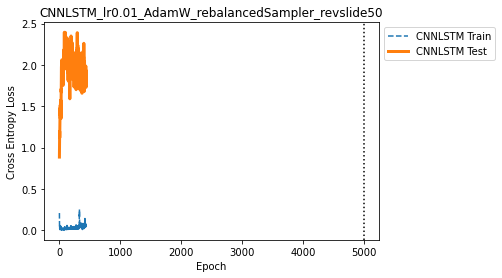

TITLE: CNNLSTM_lr0.01_RMSprop_rebalancedSampler_revslide50


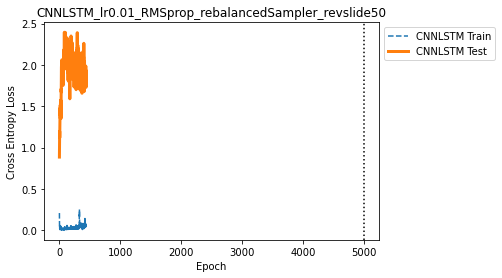

TITLE: CNN32_lr0.001_SGD_rebalancedSampler_revslide50


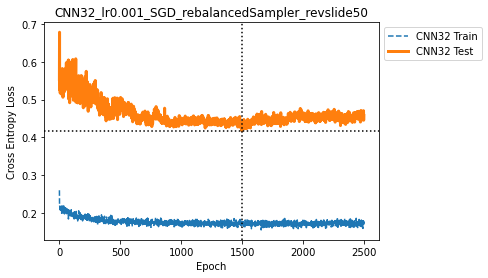

TITLE: CNN32_lr0.001_Adam_rebalancedSampler_revslide50


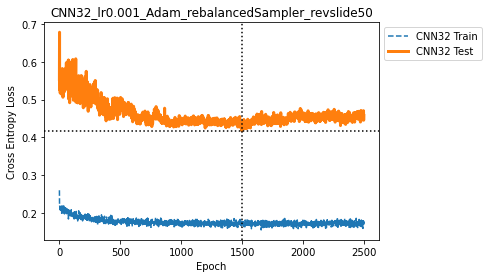

TITLE: CNN32_lr0.001_Adagrad_rebalancedSampler_revslide50


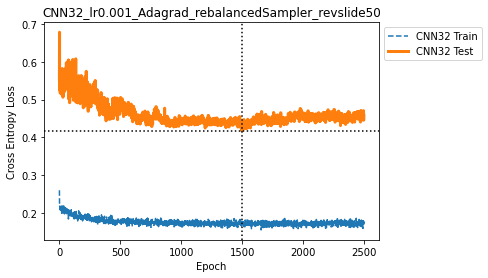

TITLE: CNN32_lr0.001_AdamW_rebalancedSampler_revslide50


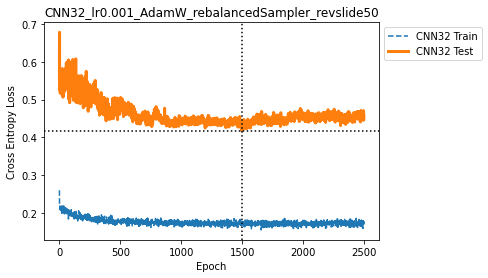

TITLE: CNN32_lr0.001_RMSprop_rebalancedSampler_revslide50


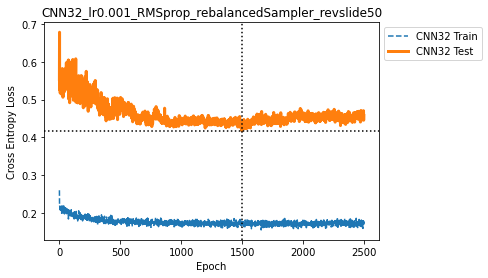

TITLE: LSTM_lr0.001_SGD_rebalancedSampler_revslide50


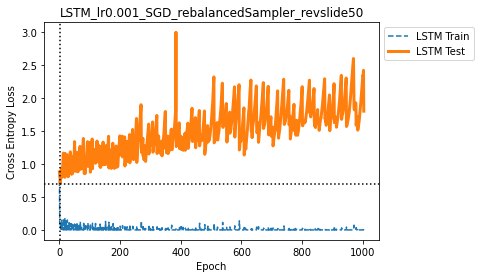

TITLE: LSTM_lr0.001_Adam_rebalancedSampler_revslide50


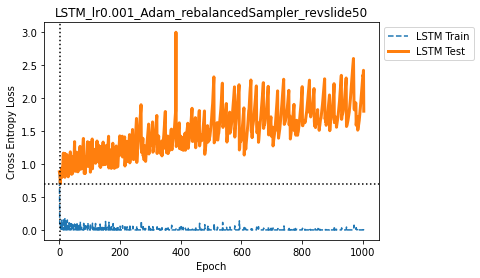

TITLE: LSTM_lr0.001_Adagrad_rebalancedSampler_revslide50


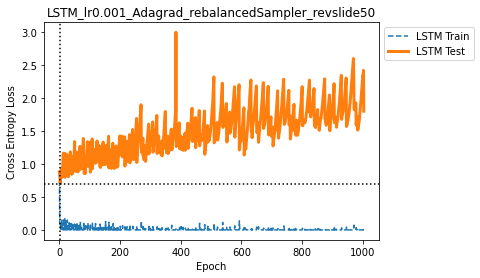

TITLE: LSTM_lr0.001_AdamW_rebalancedSampler_revslide50


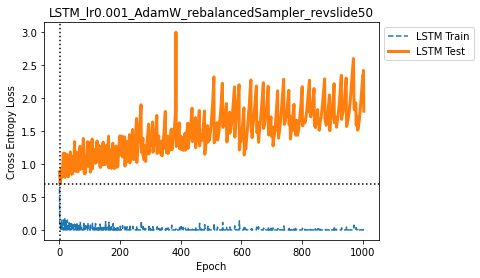

TITLE: LSTM_lr0.001_RMSprop_rebalancedSampler_revslide50


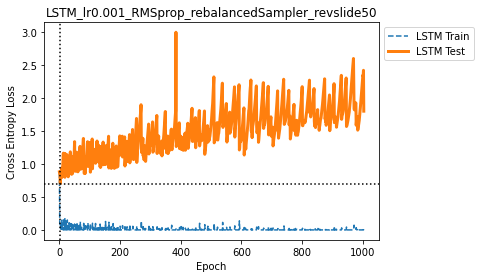

TITLE: CNNLSTM_lr0.001_SGD_rebalancedSampler_revslide50


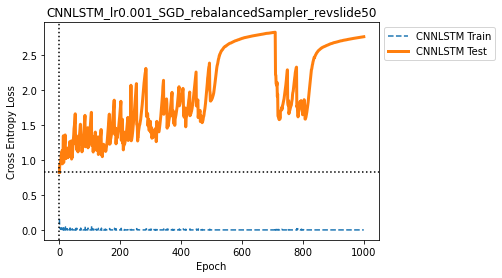

TITLE: CNNLSTM_lr0.001_Adam_rebalancedSampler_revslide50


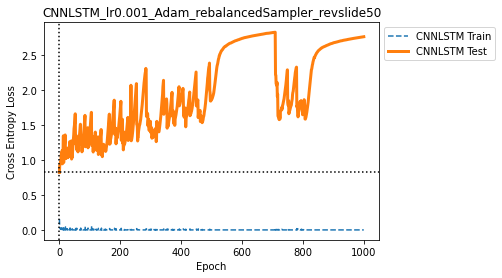

TITLE: CNNLSTM_lr0.001_Adagrad_rebalancedSampler_revslide50


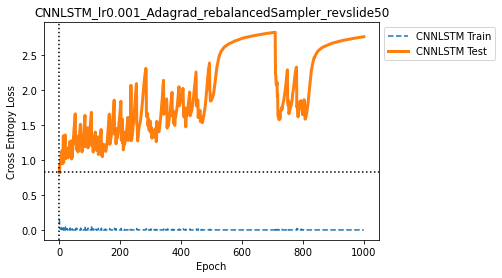

TITLE: CNNLSTM_lr0.001_AdamW_rebalancedSampler_revslide50


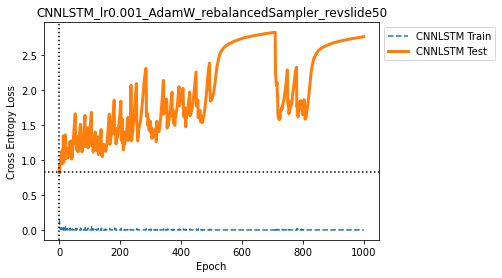

TITLE: CNNLSTM_lr0.001_RMSprop_rebalancedSampler_revslide50


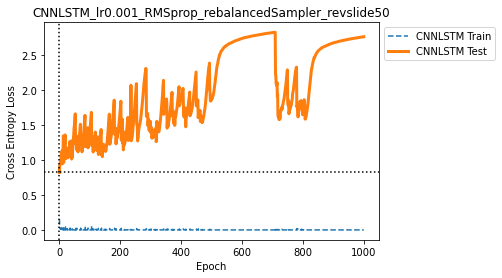

TITLE: CNN32_lr0.01_SGD_rebalancedSampler_mutation0.1


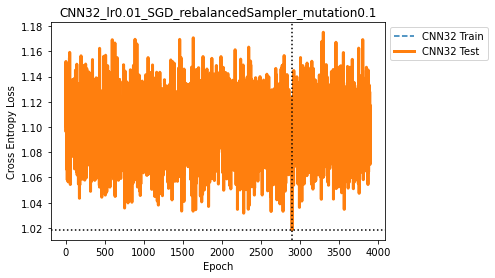

TITLE: CNN32_lr0.01_Adam_rebalancedSampler_mutation0.1


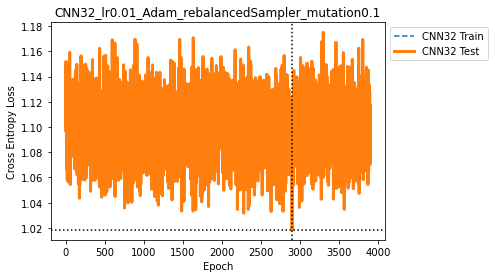

TITLE: CNN32_lr0.01_Adagrad_rebalancedSampler_mutation0.1


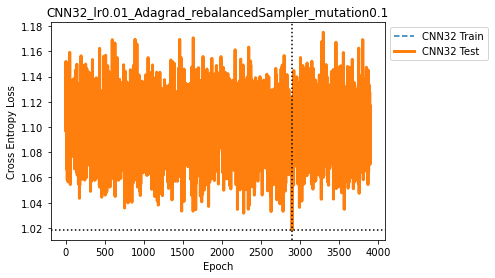

TITLE: CNN32_lr0.01_AdamW_rebalancedSampler_mutation0.1


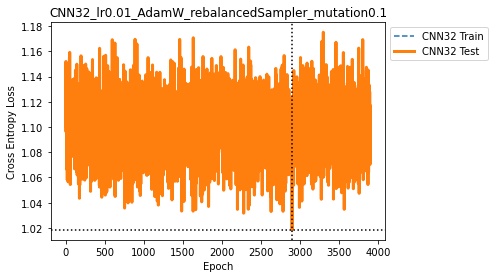

TITLE: CNN32_lr0.01_RMSprop_rebalancedSampler_mutation0.1


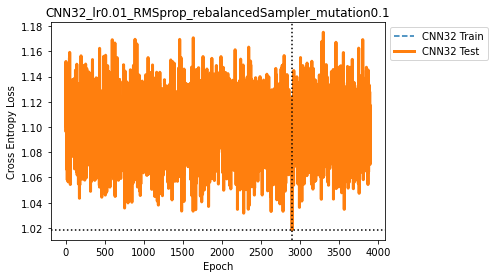

TITLE: LSTM_lr0.01_SGD_rebalancedSampler_mutation0.1


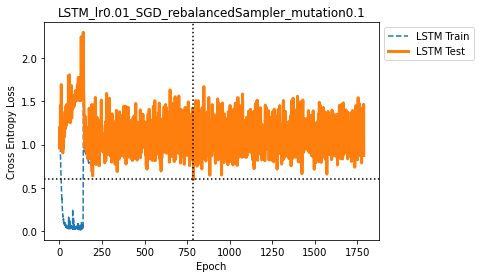

TITLE: LSTM_lr0.01_Adam_rebalancedSampler_mutation0.1


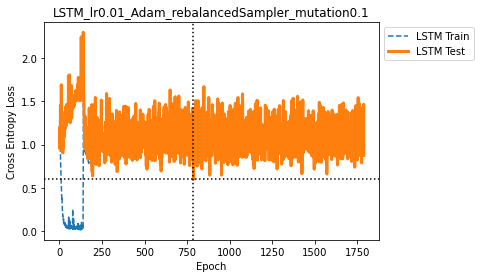

TITLE: LSTM_lr0.01_Adagrad_rebalancedSampler_mutation0.1


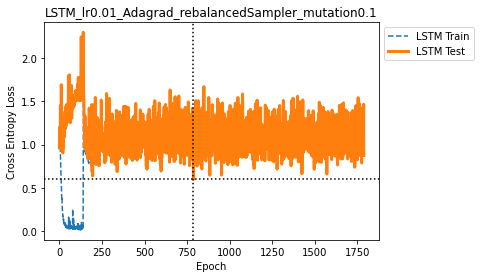

TITLE: LSTM_lr0.01_AdamW_rebalancedSampler_mutation0.1


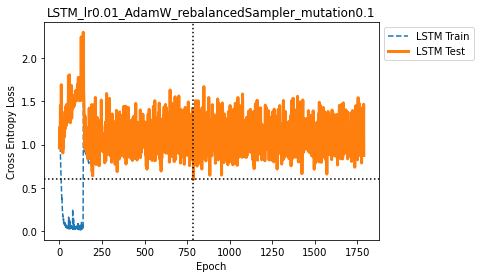

TITLE: LSTM_lr0.01_RMSprop_rebalancedSampler_mutation0.1


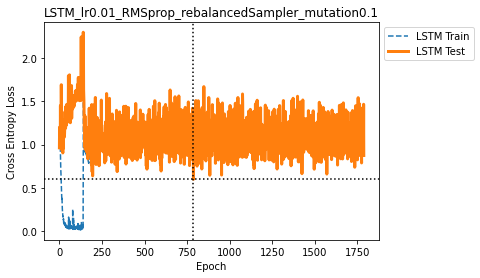

TITLE: CNNLSTM_lr0.01_SGD_rebalancedSampler_mutation0.1


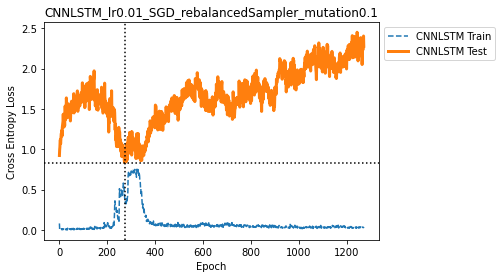

TITLE: CNNLSTM_lr0.01_Adam_rebalancedSampler_mutation0.1


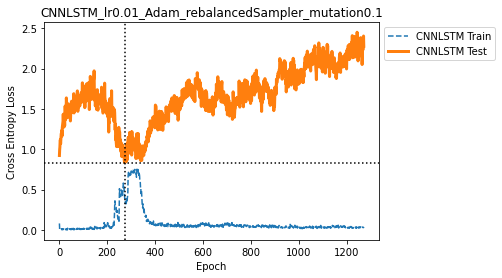

TITLE: CNNLSTM_lr0.01_Adagrad_rebalancedSampler_mutation0.1


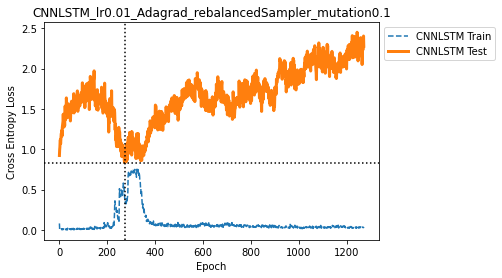

TITLE: CNNLSTM_lr0.01_AdamW_rebalancedSampler_mutation0.1


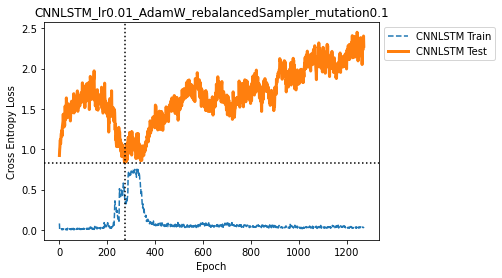

TITLE: CNNLSTM_lr0.01_RMSprop_rebalancedSampler_mutation0.1


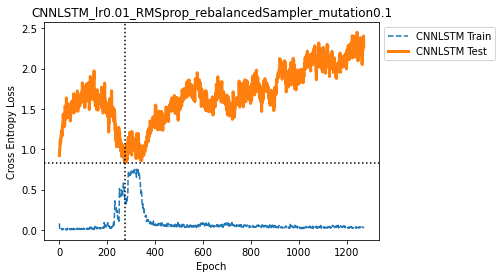

TITLE: CNN32_lr0.001_SGD_rebalancedSampler_mutation0.1


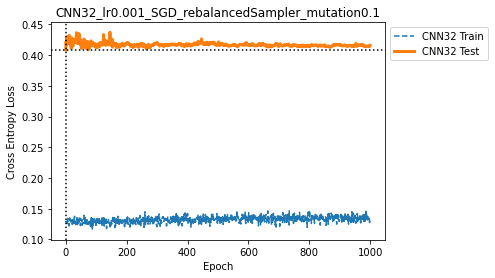

TITLE: CNN32_lr0.001_Adam_rebalancedSampler_mutation0.1


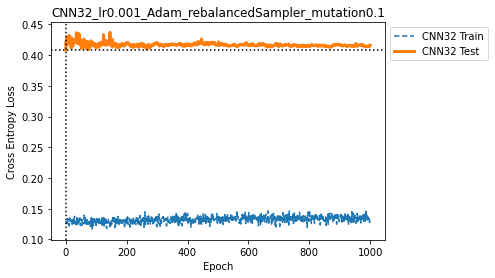

TITLE: CNN32_lr0.001_Adagrad_rebalancedSampler_mutation0.1


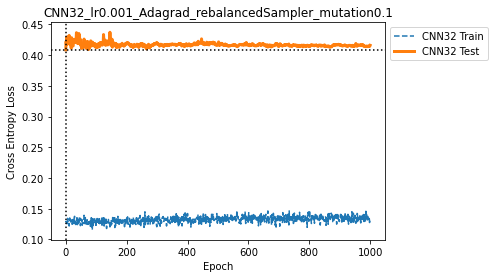

TITLE: CNN32_lr0.001_AdamW_rebalancedSampler_mutation0.1


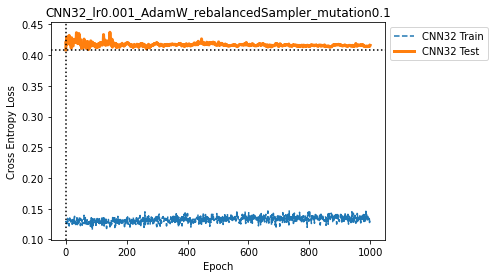

TITLE: CNN32_lr0.001_RMSprop_rebalancedSampler_mutation0.1


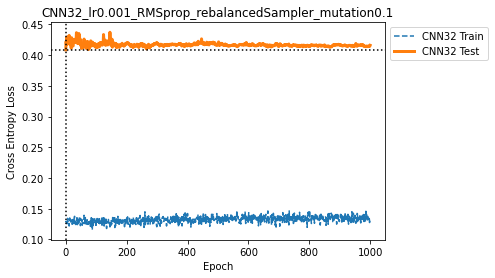

TITLE: LSTM_lr0.001_SGD_rebalancedSampler_mutation0.1


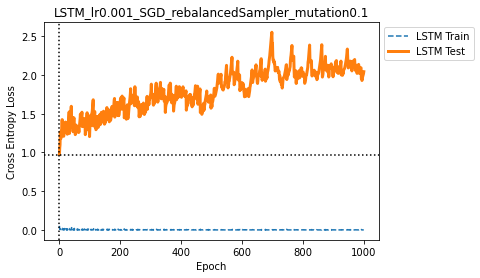

TITLE: LSTM_lr0.001_Adam_rebalancedSampler_mutation0.1


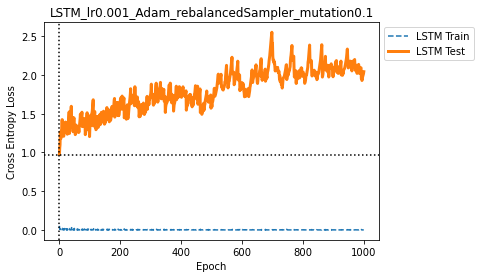

TITLE: LSTM_lr0.001_Adagrad_rebalancedSampler_mutation0.1


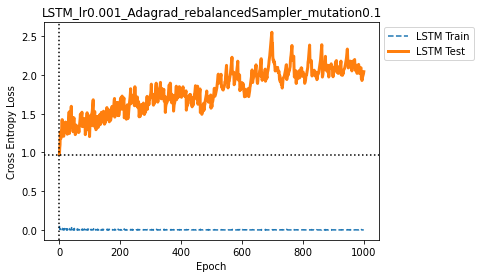

TITLE: LSTM_lr0.001_AdamW_rebalancedSampler_mutation0.1


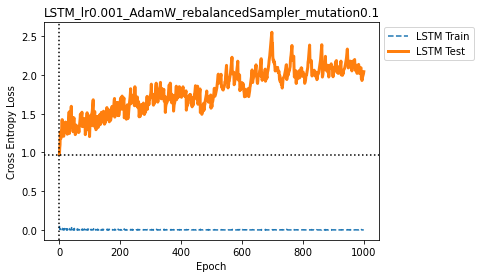

TITLE: LSTM_lr0.001_RMSprop_rebalancedSampler_mutation0.1


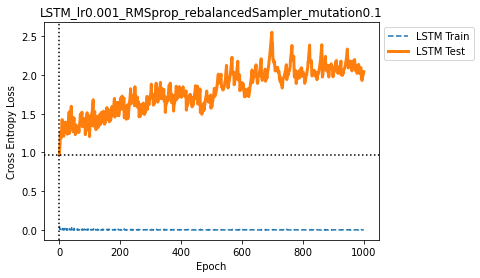

TITLE: CNNLSTM_lr0.001_SGD_rebalancedSampler_mutation0.1


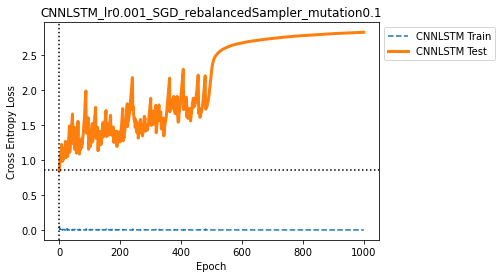

TITLE: CNNLSTM_lr0.001_Adam_rebalancedSampler_mutation0.1


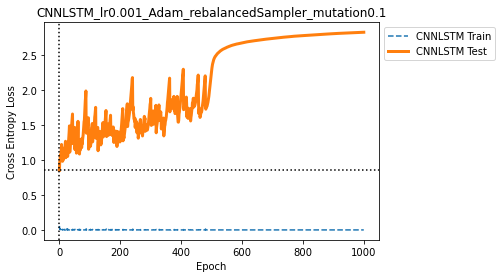

TITLE: CNNLSTM_lr0.001_Adagrad_rebalancedSampler_mutation0.1


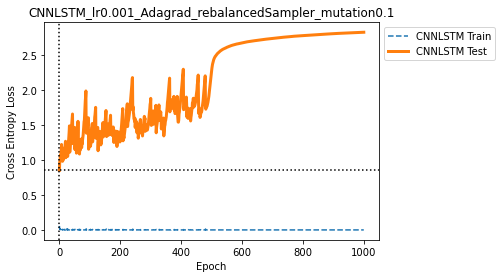

TITLE: CNNLSTM_lr0.001_AdamW_rebalancedSampler_mutation0.1


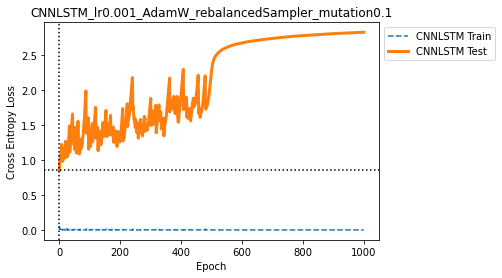

TITLE: CNNLSTM_lr0.001_RMSprop_rebalancedSampler_mutation0.1


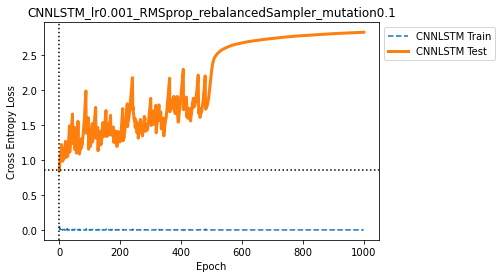

In [37]:
traces = []
for m in loss_dict:
#     train_losses = loss_dict[m]['train_losses']
#     val_losses = loss_dict[m]['val_losses']
#     estop = loss_dict[m]['estop']
#     best_val_loss = loss_dict[m]['best_val_loss']
    data_label = loss_dict[m]['data_label']
    
    #info = ((train_losses,val_losses),estop, best_val_loss, data_label)
    traces.append(data_label)
    
    print(f"TITLE: {m}")
    quick_loss_plot(data_label,m,loss_type="Cross Entropy Loss")

# confusion matrices

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [41]:
train_f = 'pipe2/conf_dfs/CNN32_lr0.01_SGD_rebalancedSampler_mutation0.1_train_conf_df.tsv'
val_f = 'pipe2/conf_dfs/CNN32_lr0.01_SGD_rebalancedSampler_mutation0.1_val_conf_df.tsv'
train_df = pd.read_csv(train_f,sep='\t')
val_df = pd.read_csv(val_f,sep='\t')

In [42]:
def plot_conf_matrix_paired(dfs, name):
    
    mats = []
    #[(c,"Raw Confusion Matrix"), (cp,"Normalized Confusion Matrix")]

    for df,df_name in dfs:
        # make confusion matrix
        c = confusion_matrix(df['truth'].values, df['pred'].values)
        # make normalized confusion matrix
        cp = np.zeros(c.shape)
        for i,row in enumerate(c):
            rowsum = sum(row)
            for j,item in enumerate(row):
                val = item/rowsum
                cp[i][j] = val
        
        mats.append((c,f"{df_name} conf (raw)"))
        mats.append((cp,f"{df_name} conf (norm)"))
    
    # create figure
    

    
    f, axes = plt.subplots(2, 2, figsize=(10, 8))#, sharey='row')
    axes_list = [item for sublist in axes for item in sublist] 

    for i, (mat,title) in enumerate(mats):
        disp = ConfusionMatrixDisplay(confusion_matrix=mat)
        disp.plot(ax=axes_list.pop(0))
        disp.ax_.set_title(title)

#         if i!=0:
#             disp.ax_.set_ylabel('')

    f.suptitle(name,fontsize=20)
    #plt.show()
    plt.tight_layout()

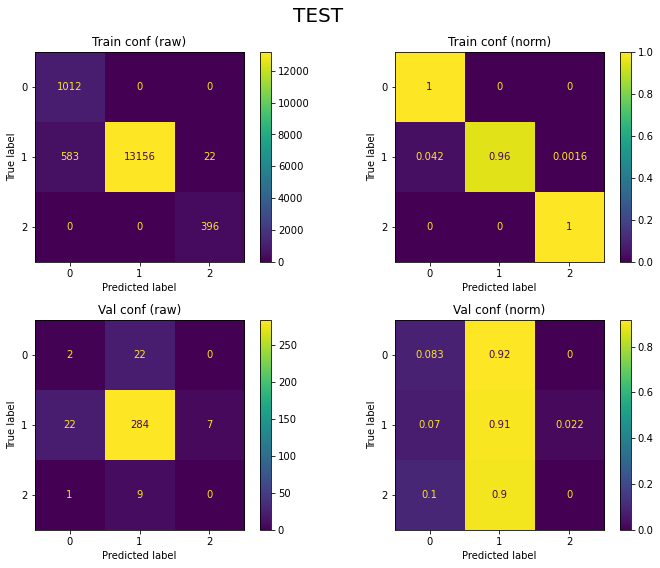

In [43]:
dfs = [(train_df,"Train"),(val_df,"Val")]
#dfs = [(train_df,"Train")]#,(val_df,"Val")]
plot_conf_matrix_paired(dfs, "TEST")

In [163]:
# loop through dir
for 

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


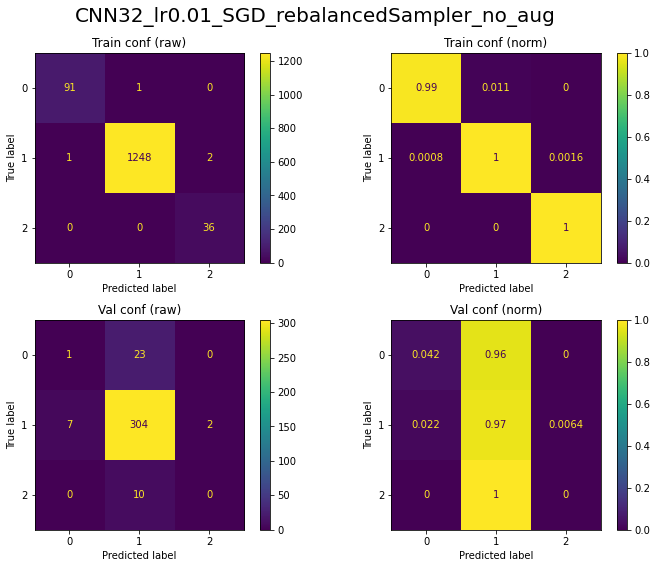

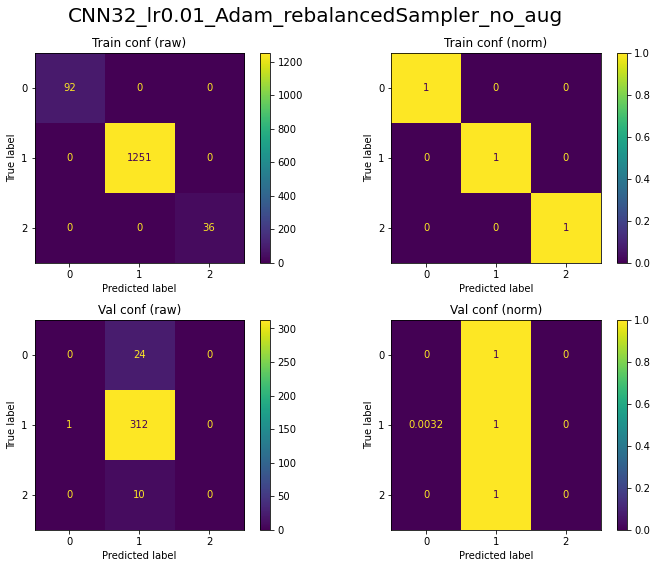

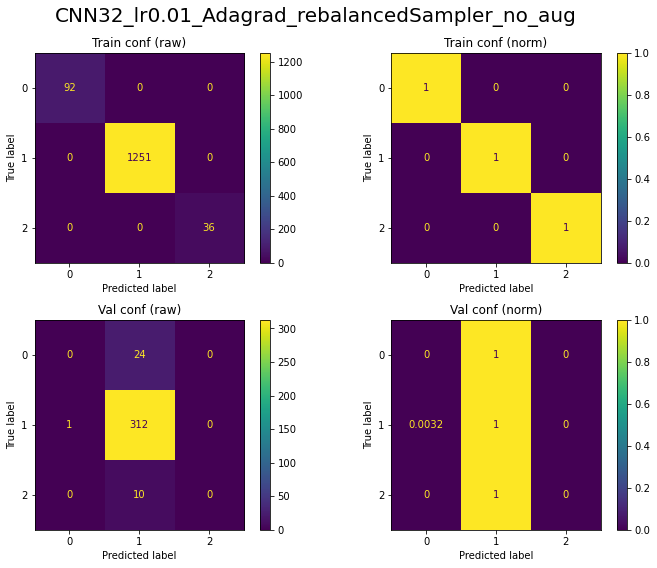

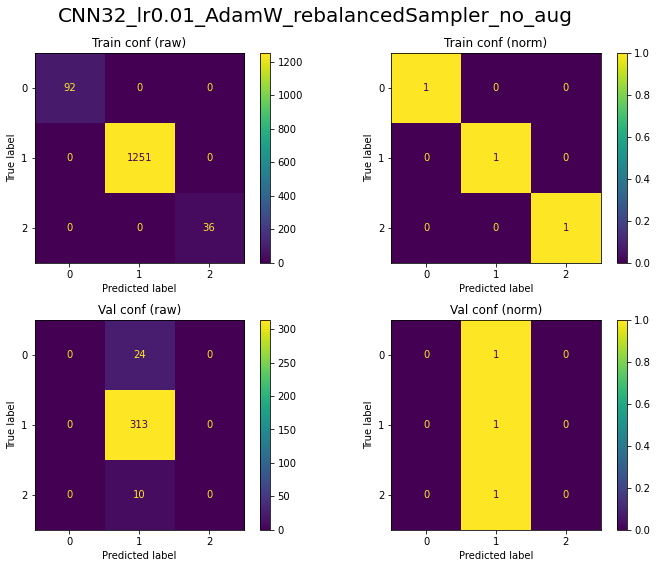

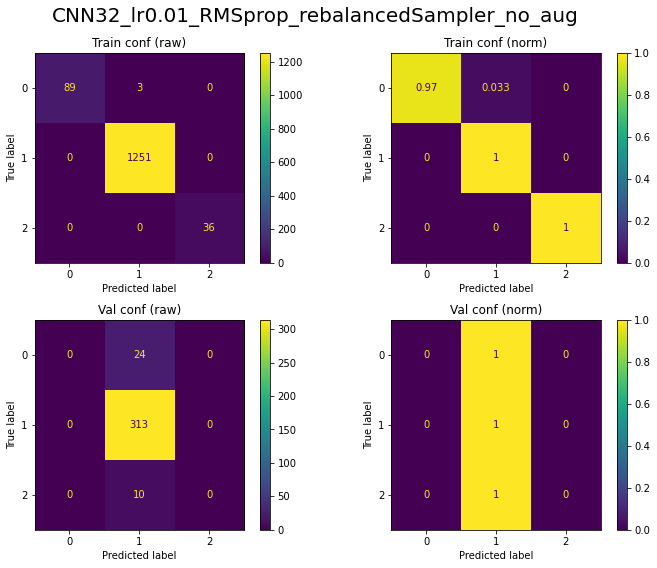

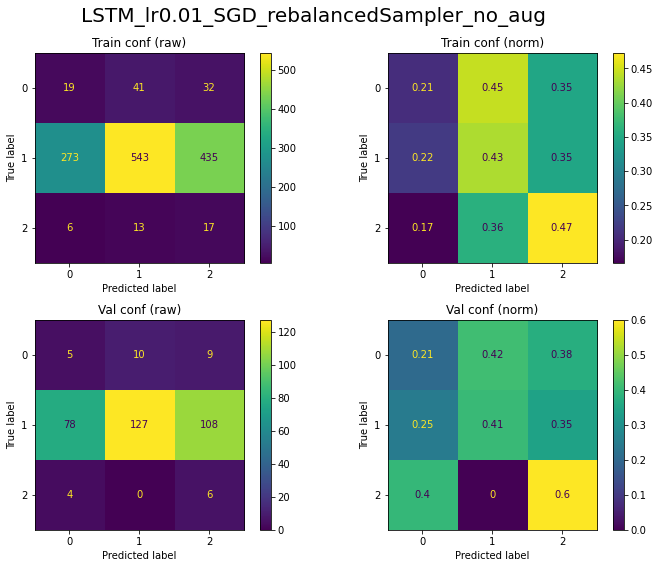

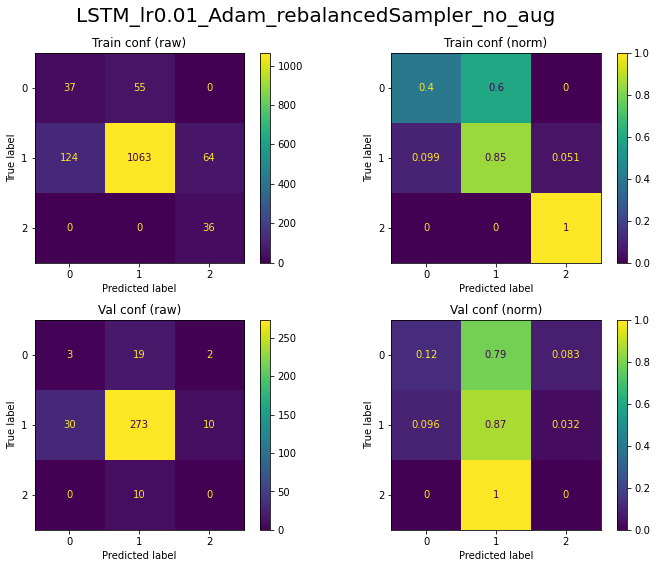

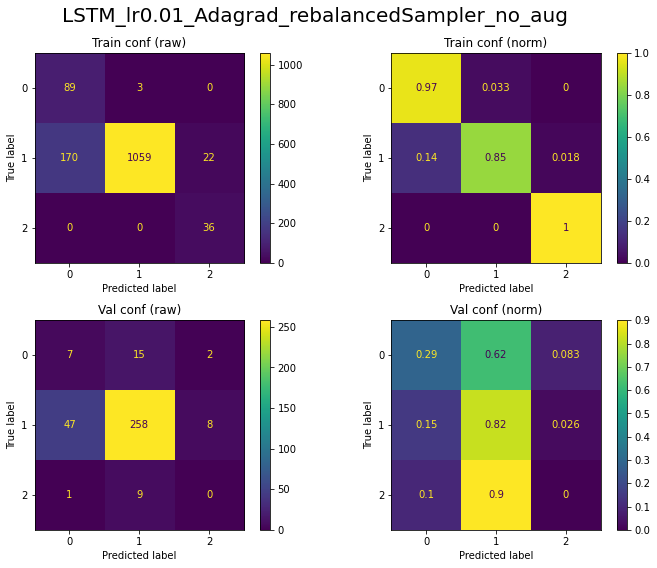

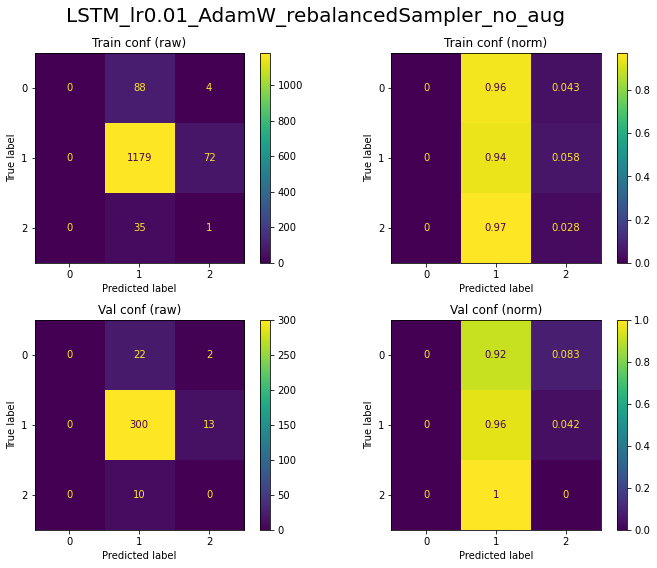

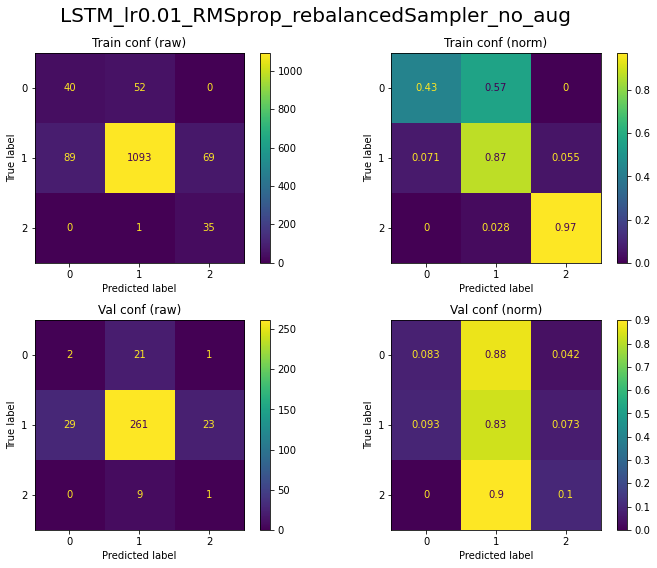

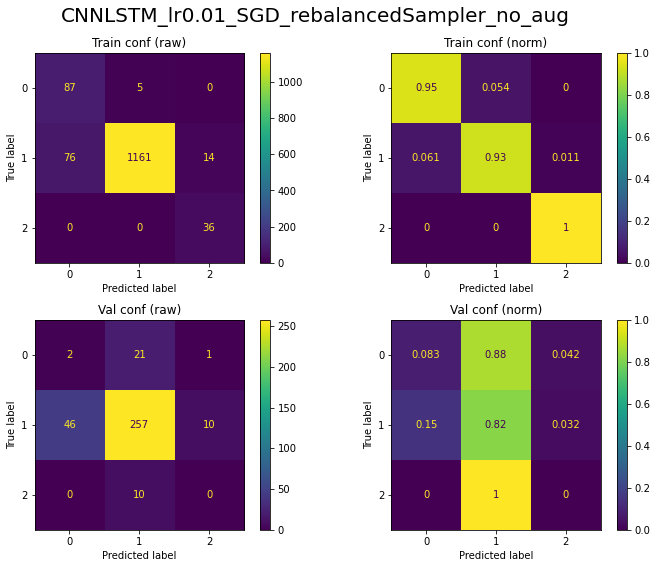

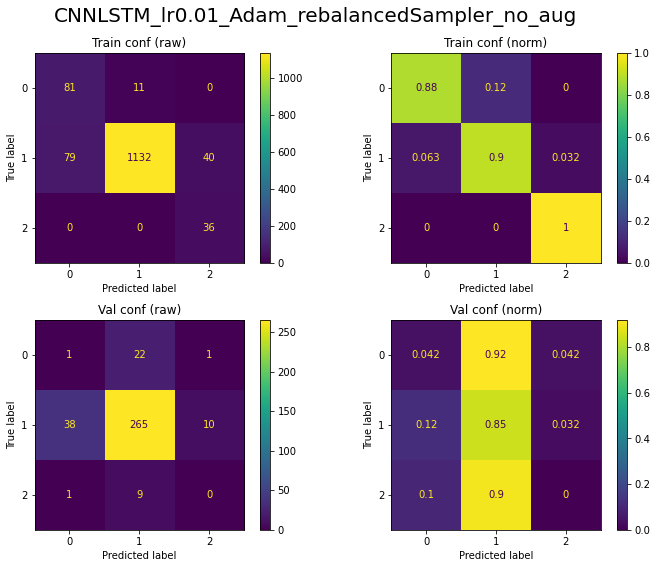

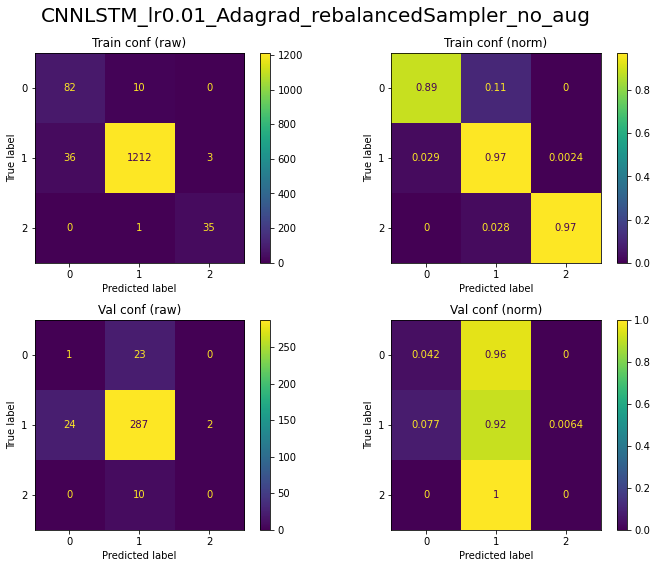

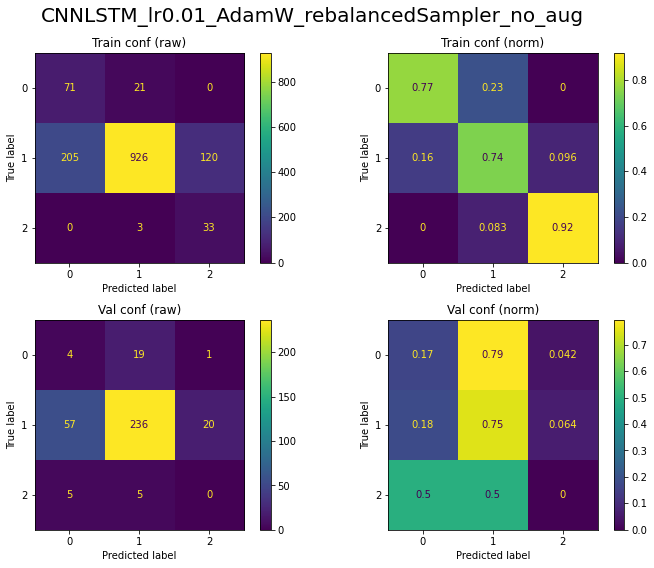

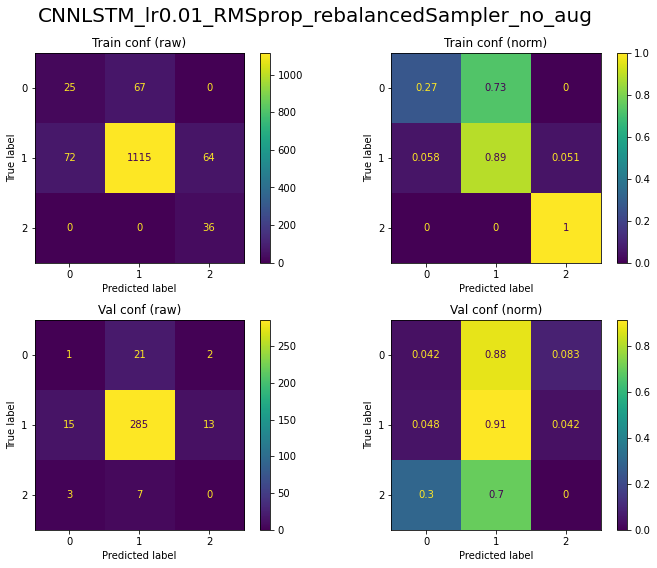

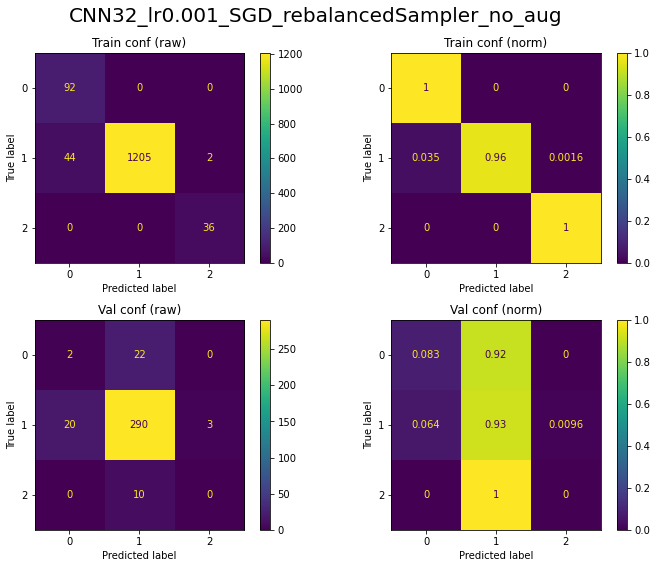

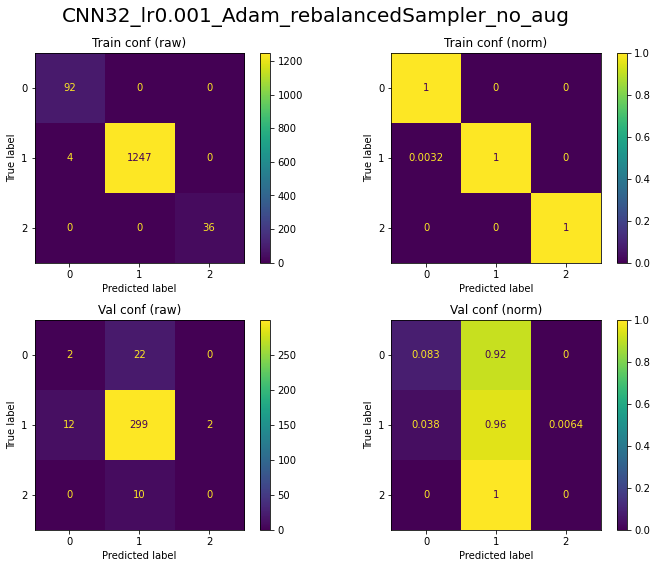

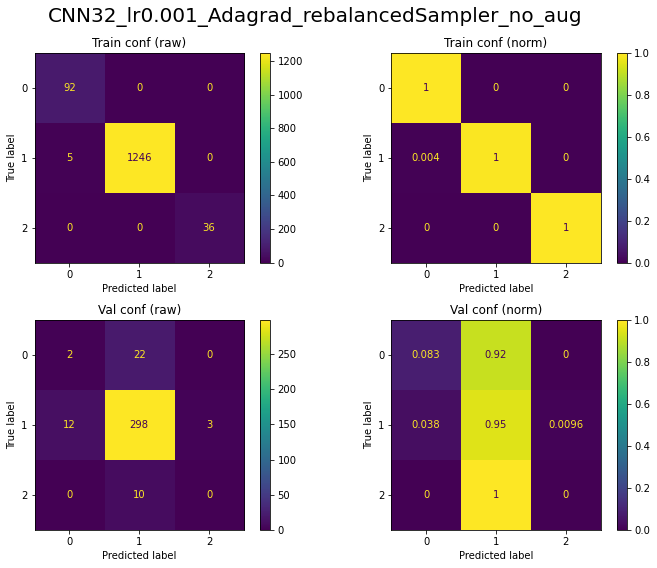

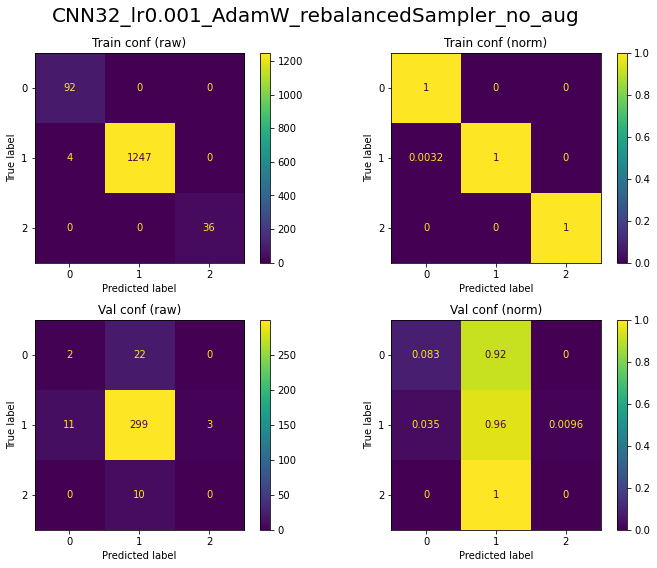

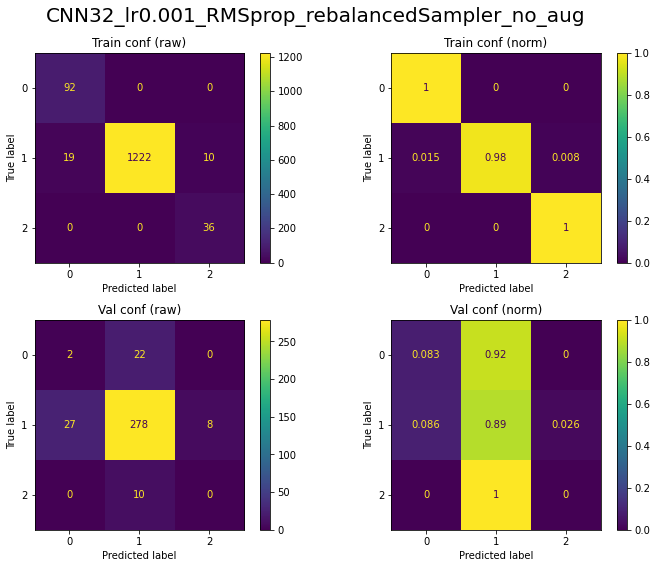

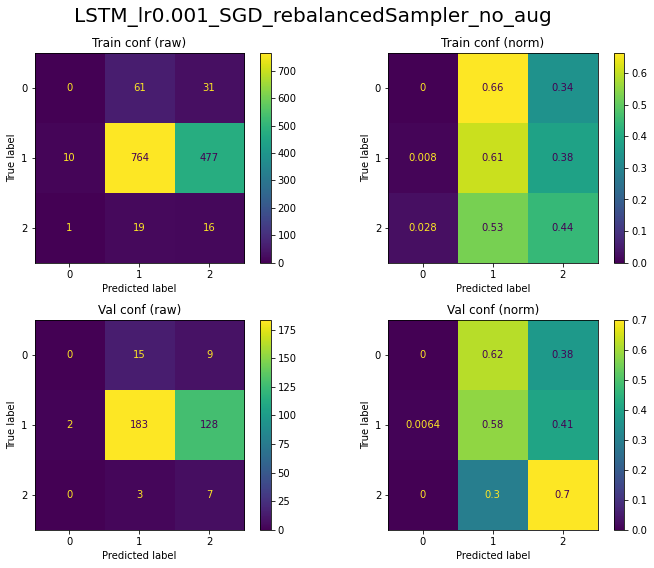

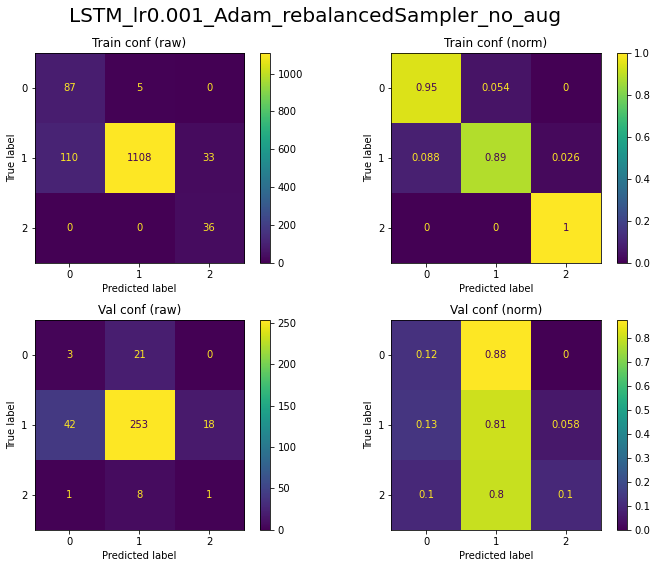

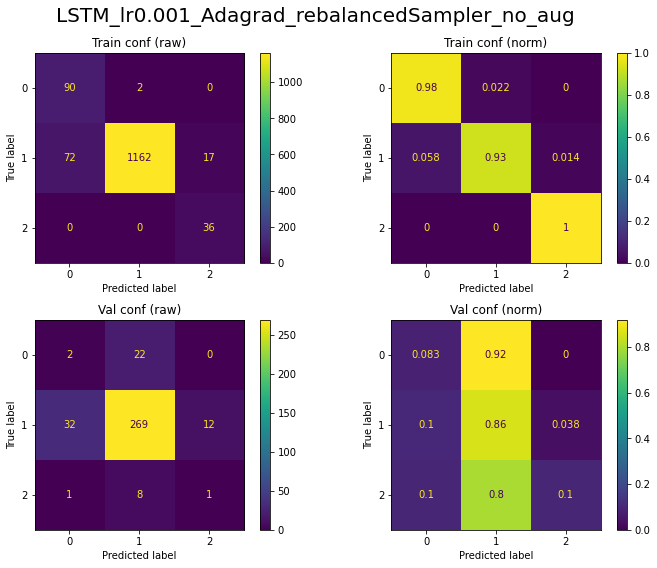

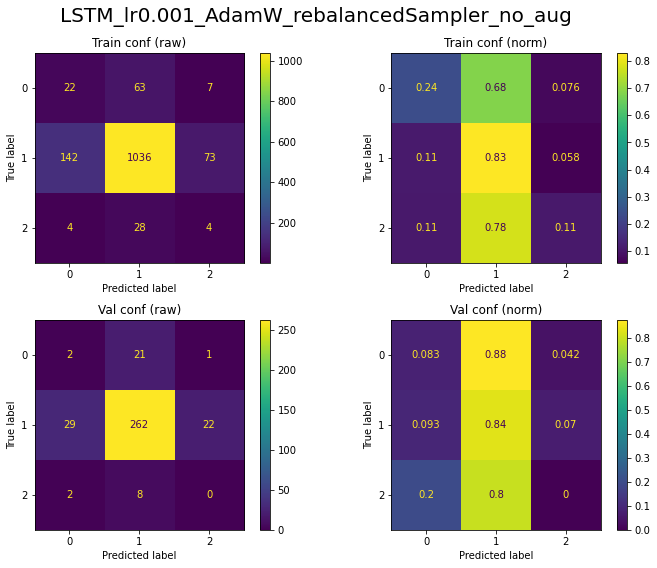

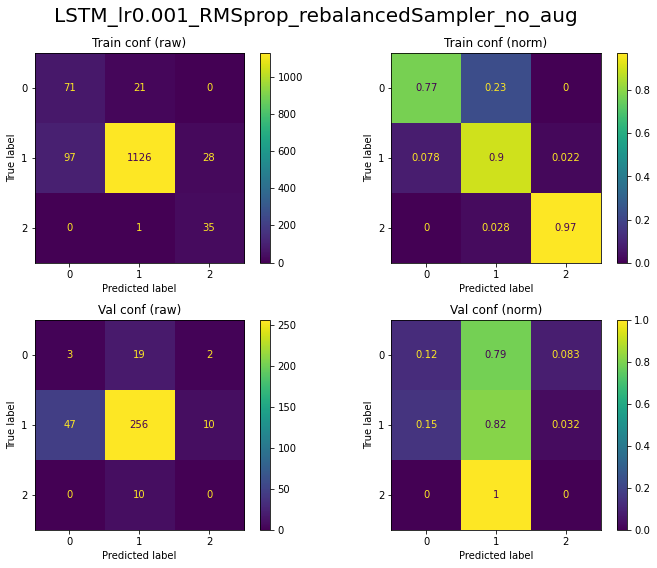

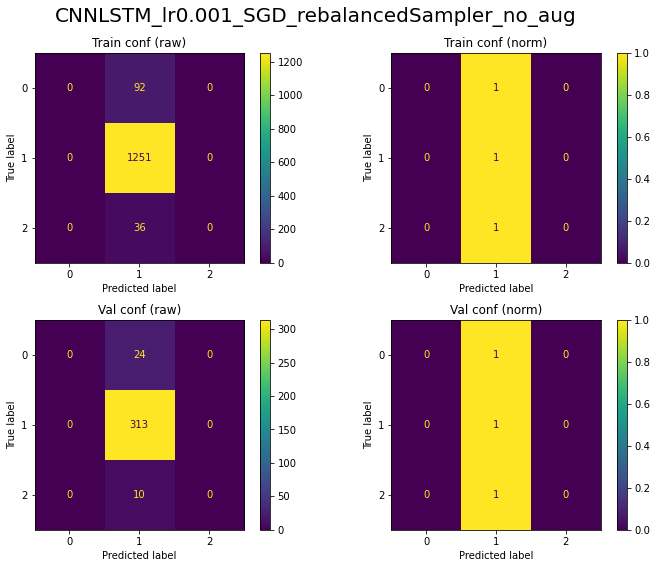

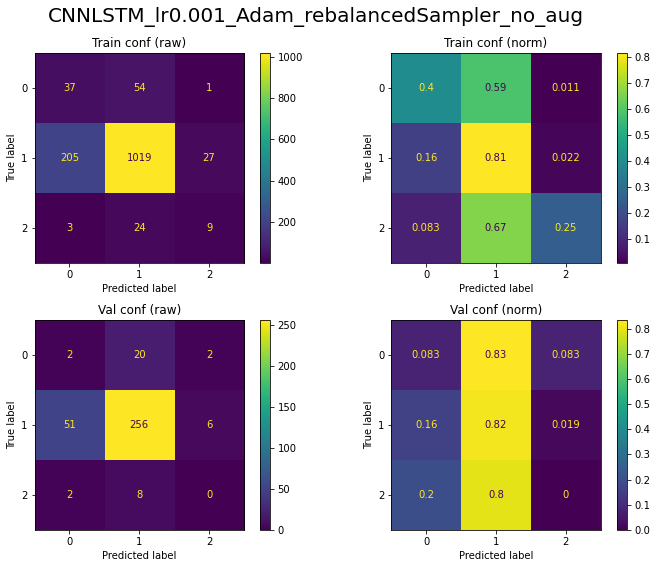

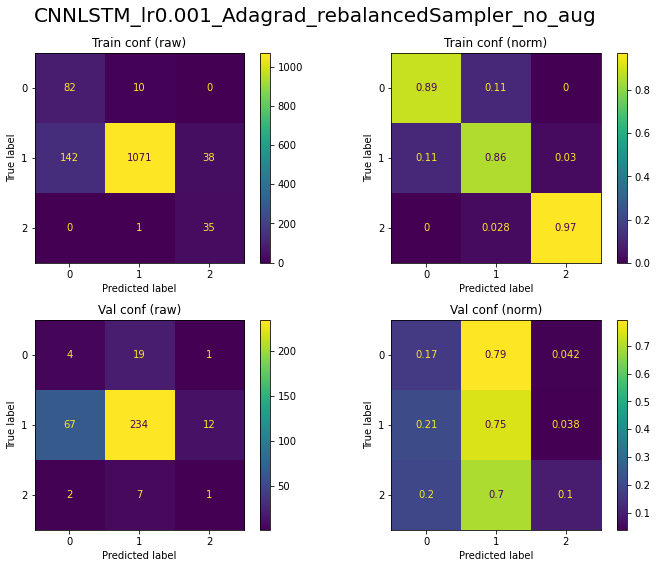

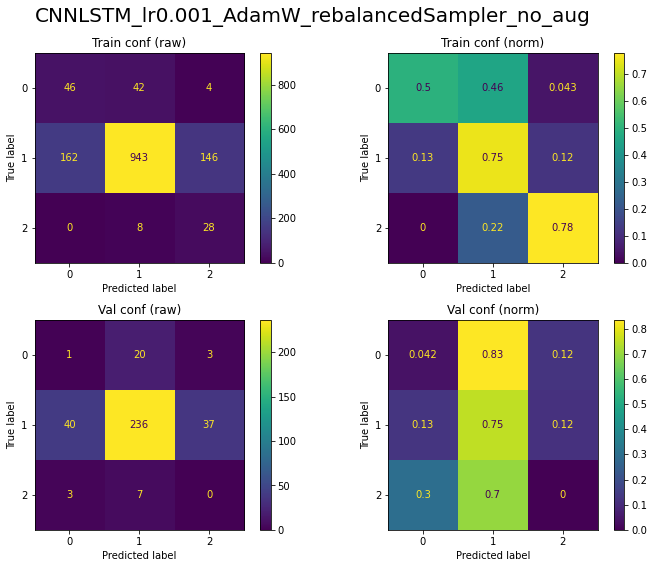

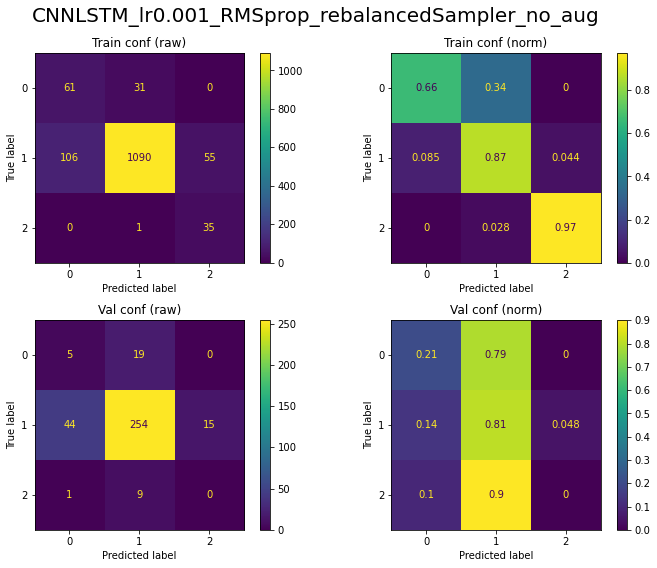

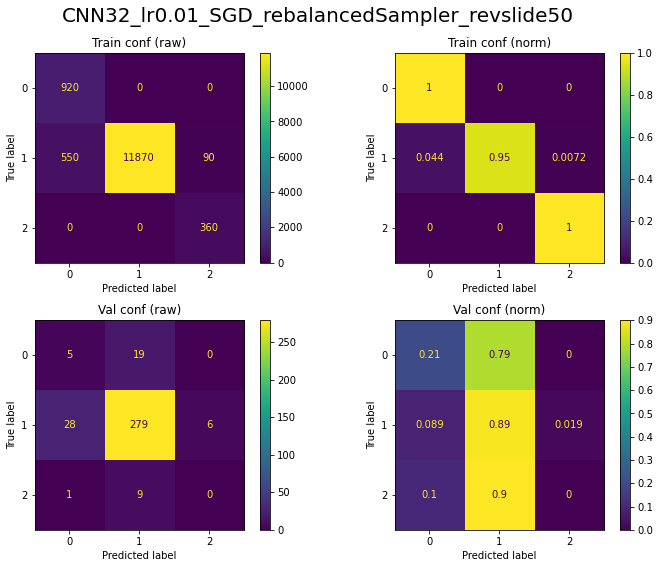

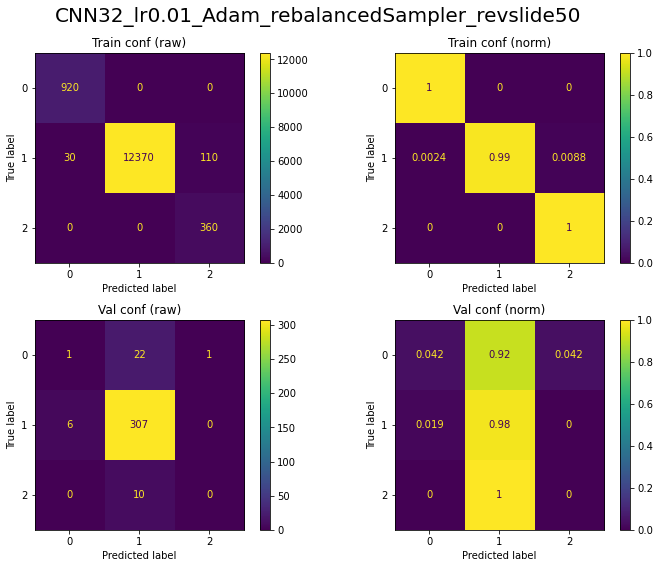

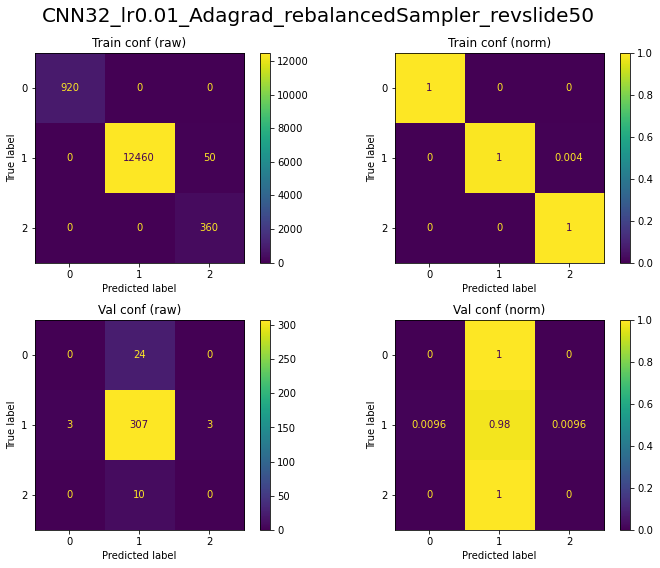

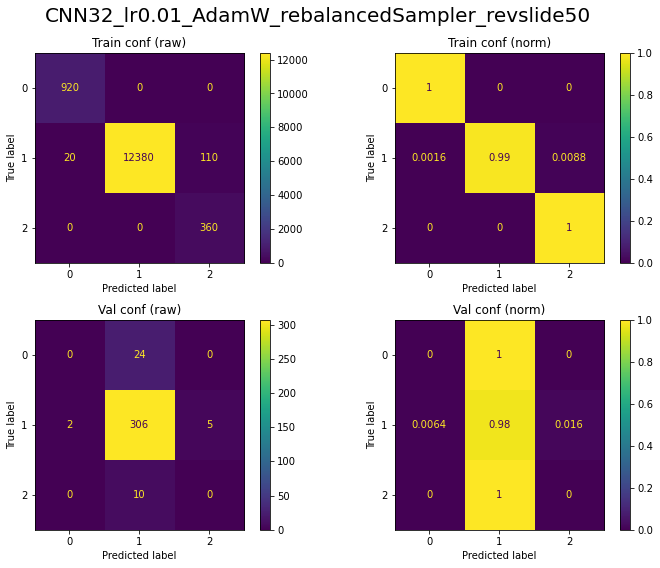

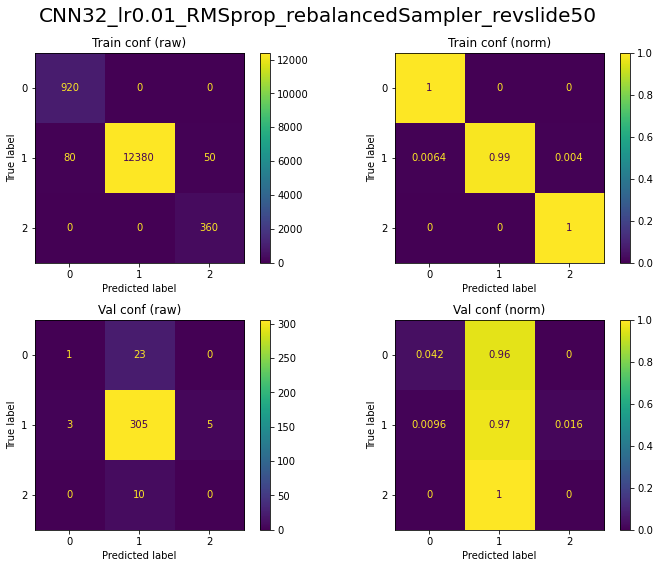

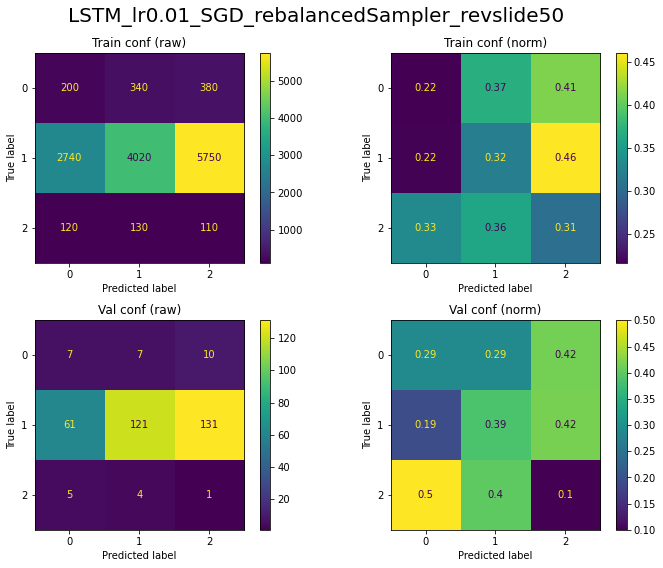

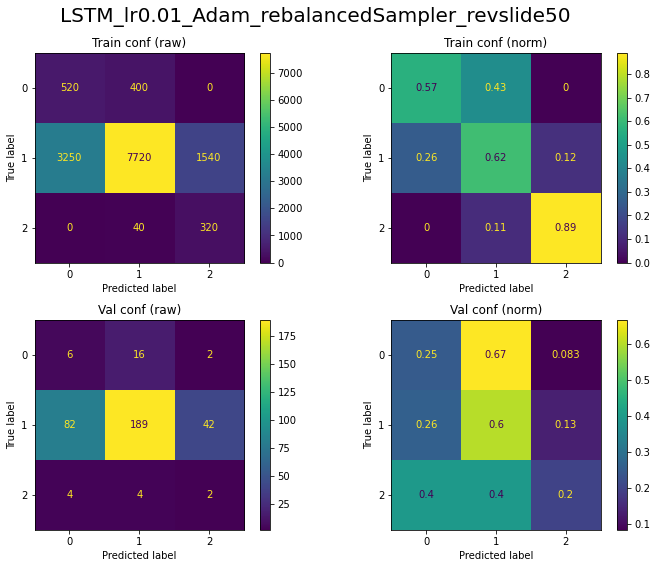

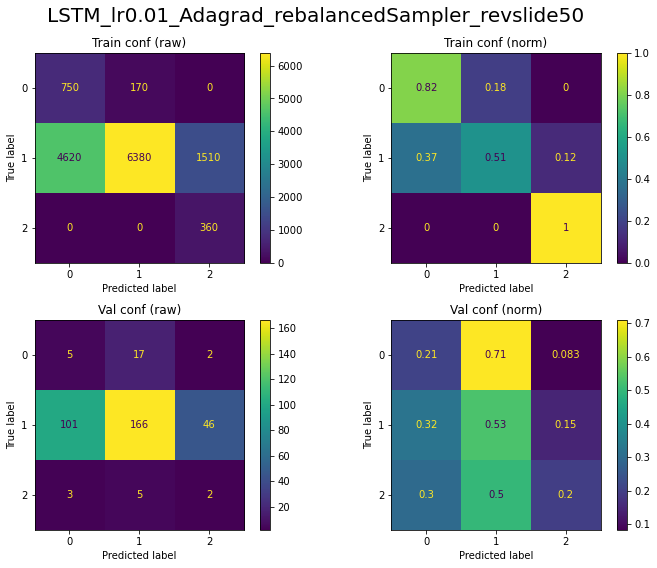

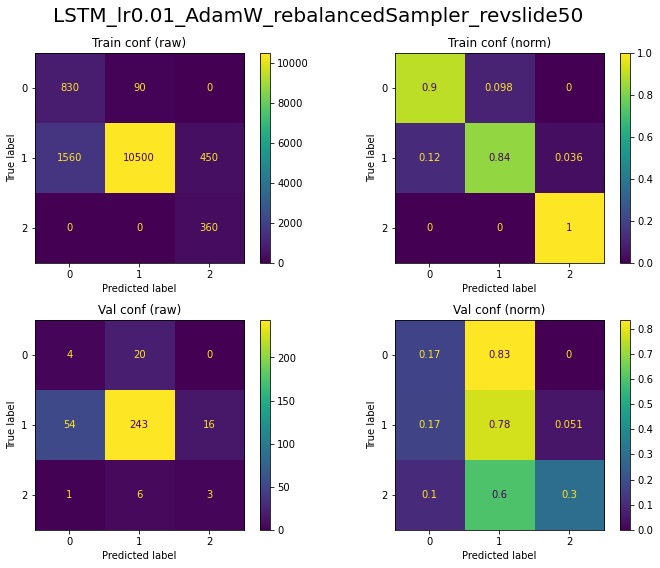

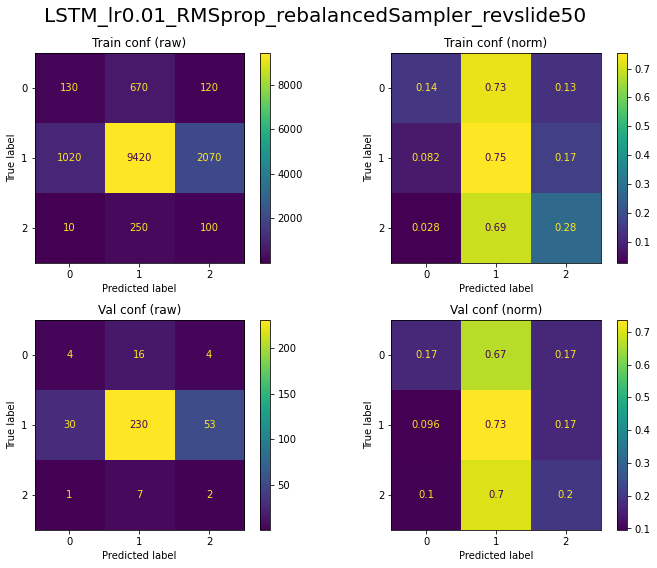

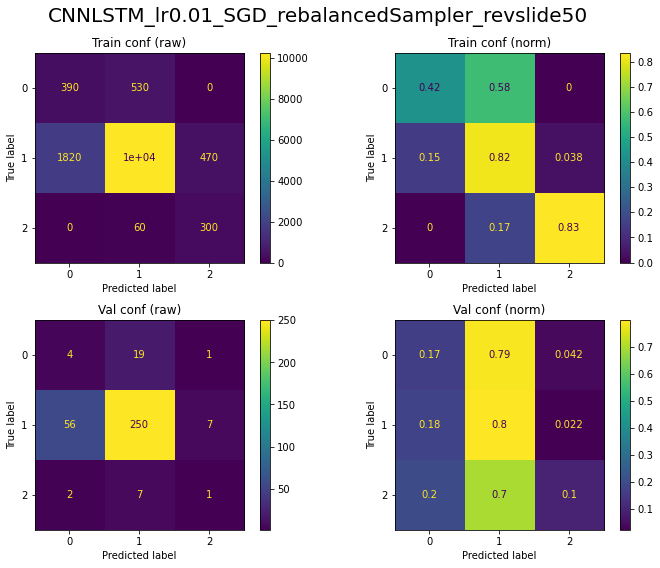

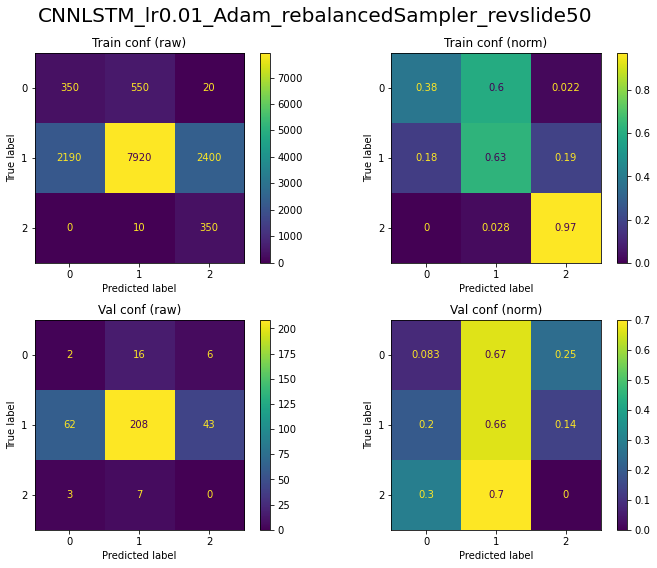

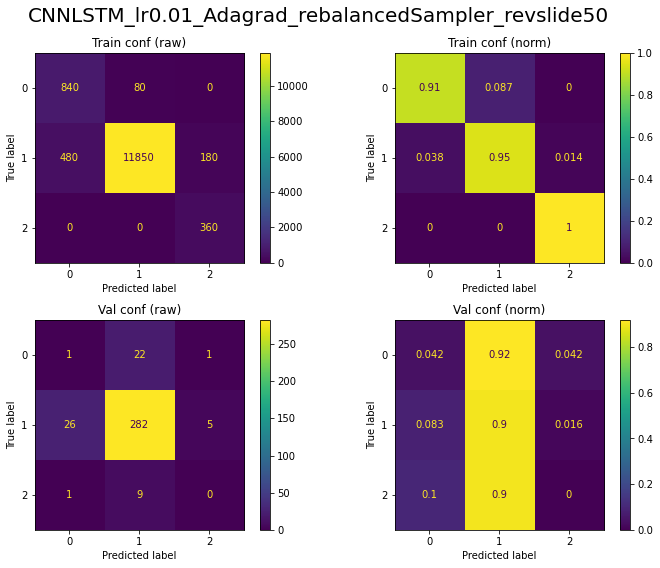

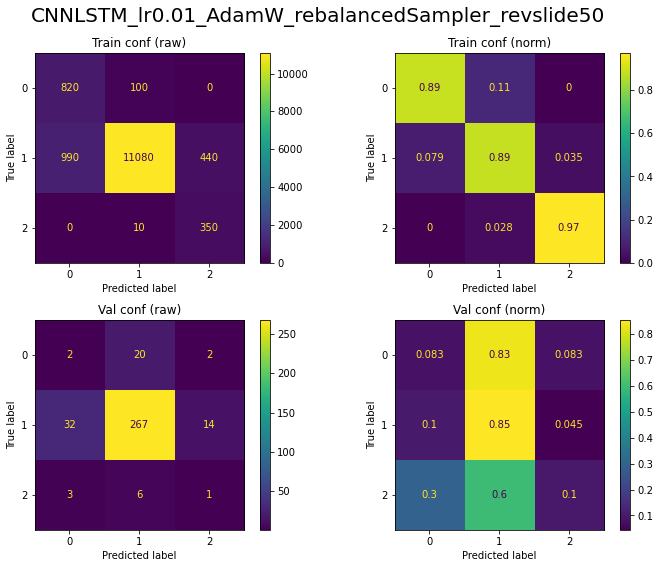

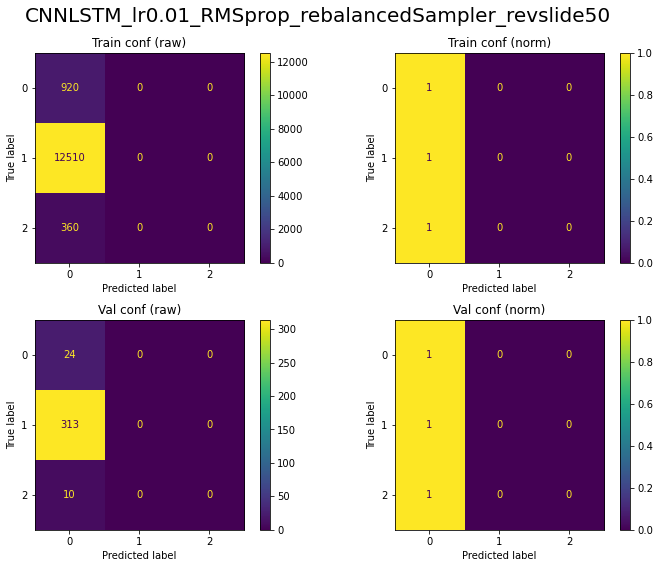

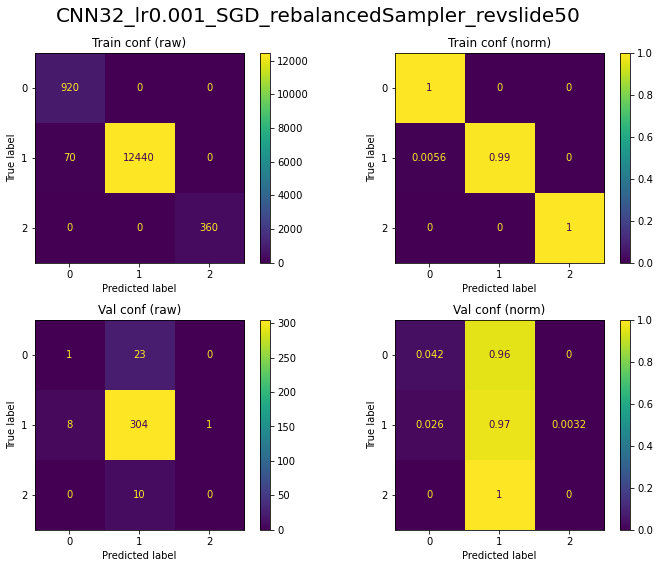

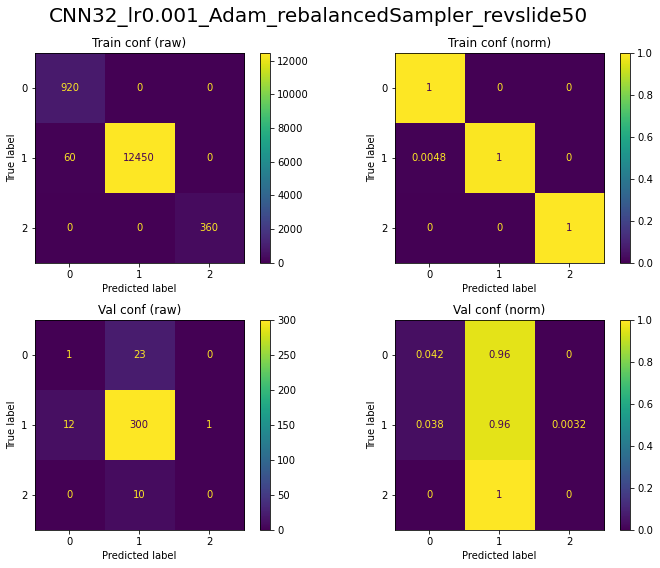

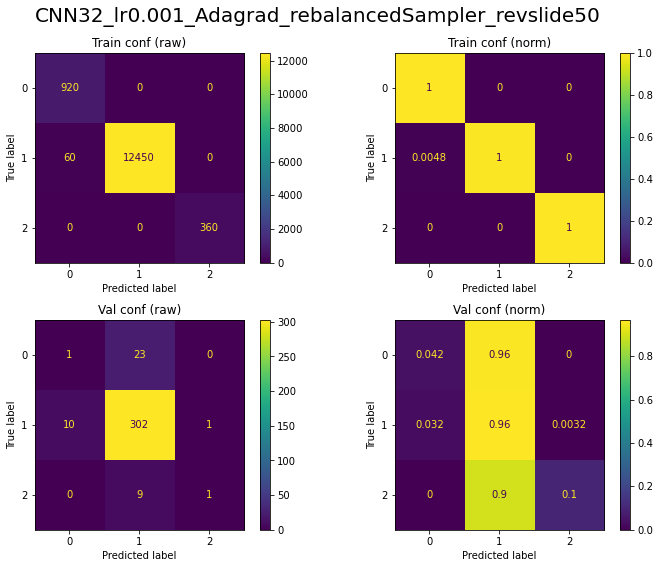

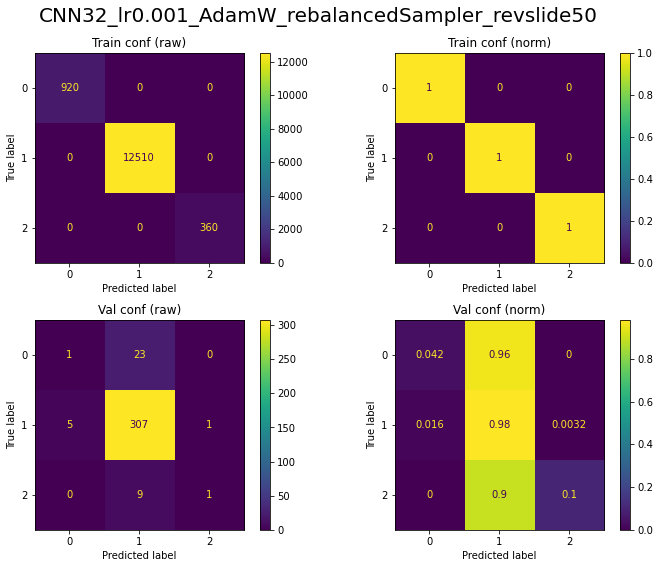

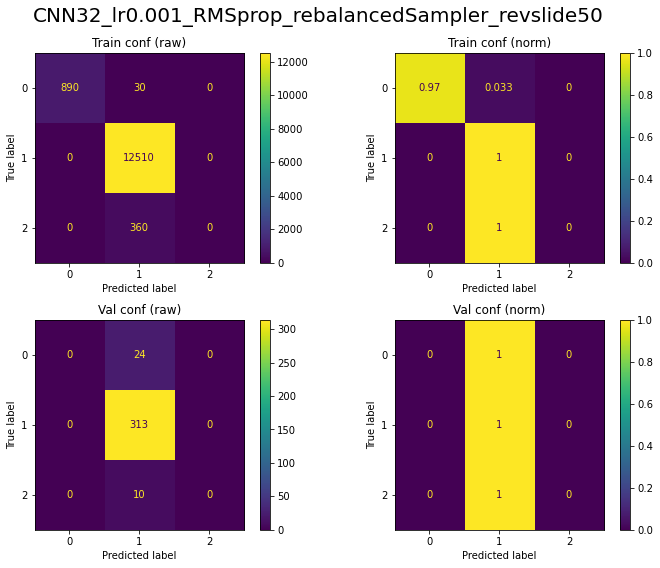

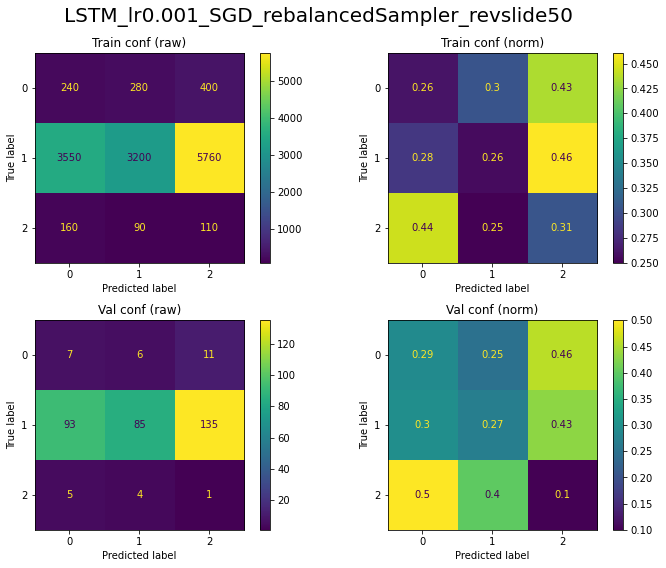

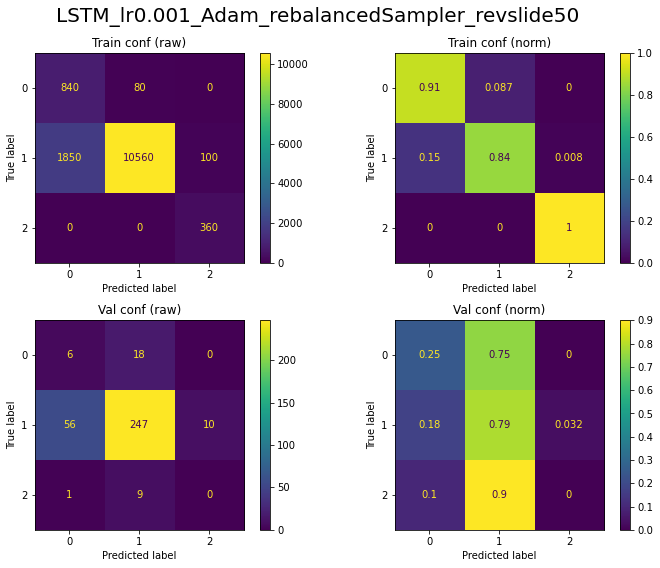

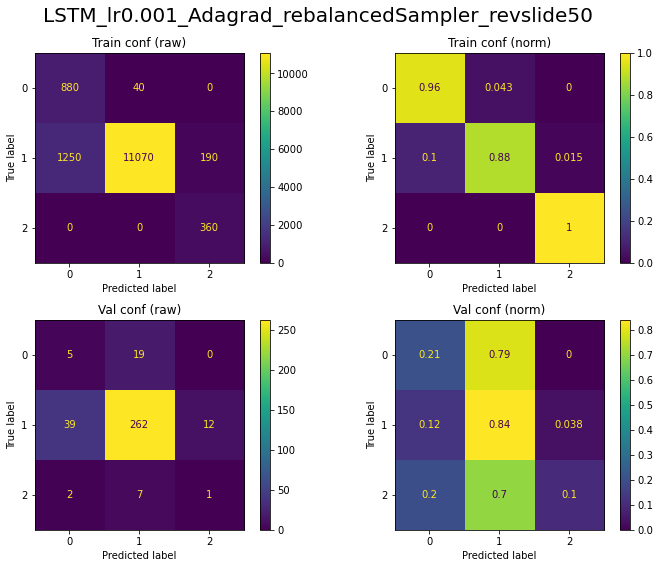

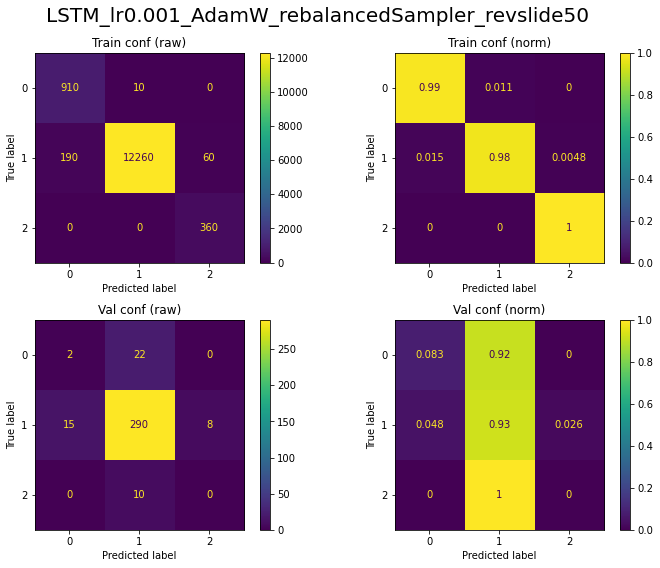

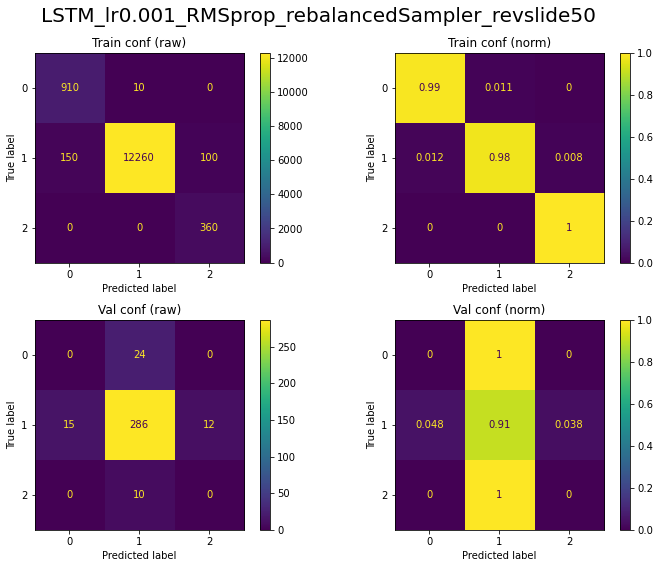

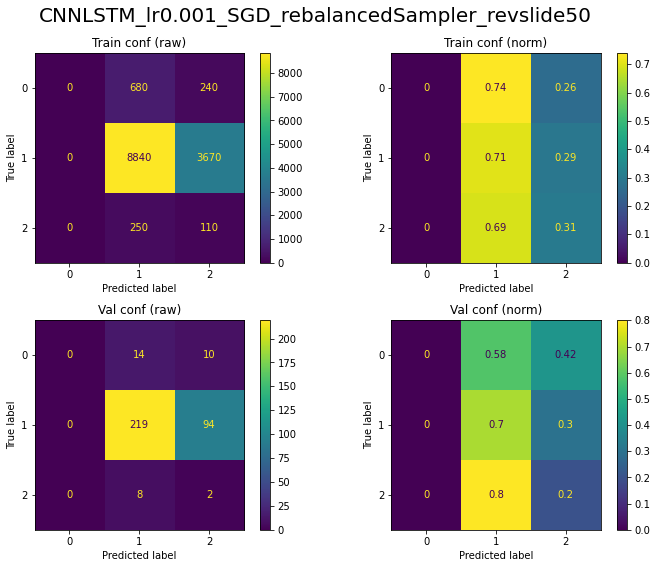

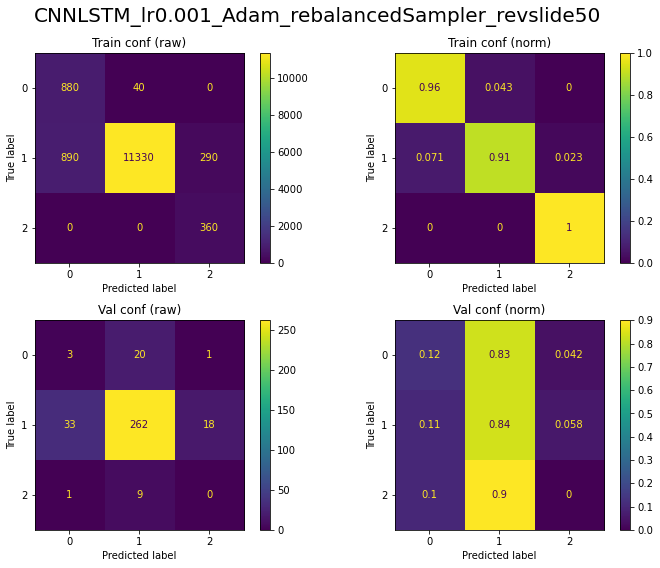

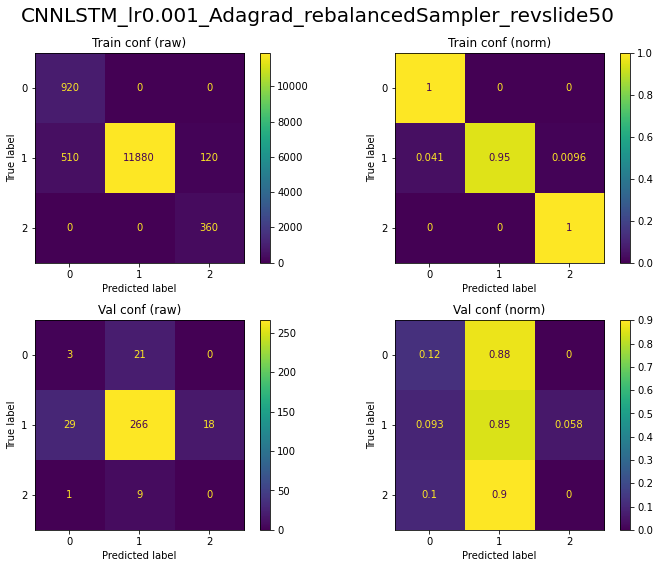

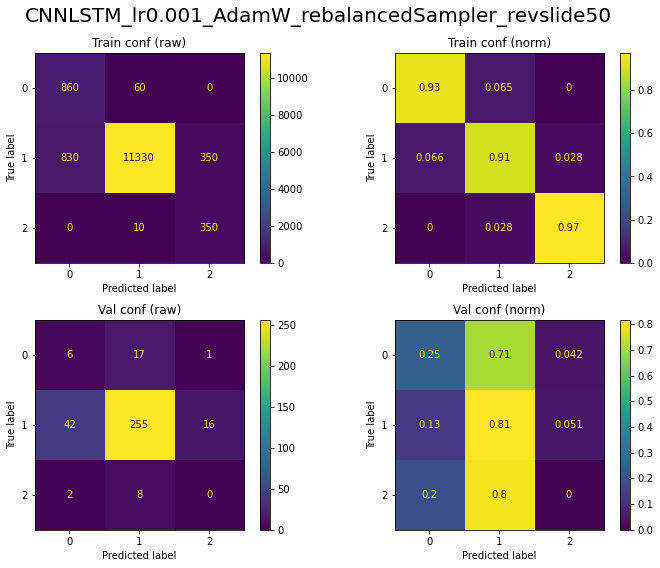

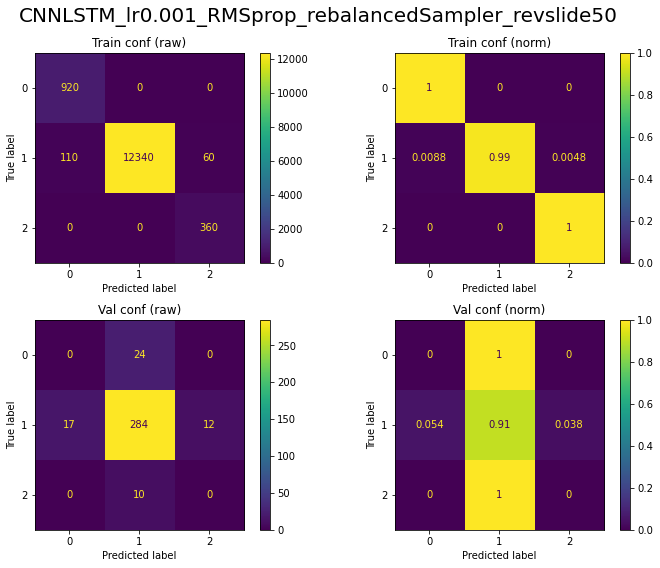

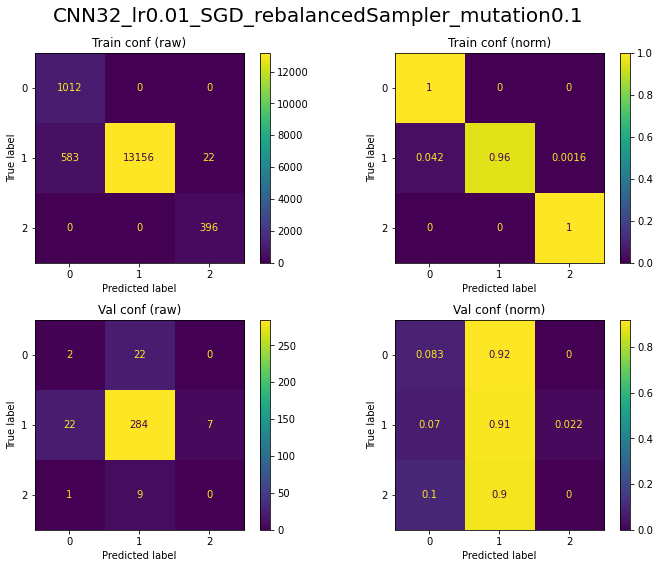

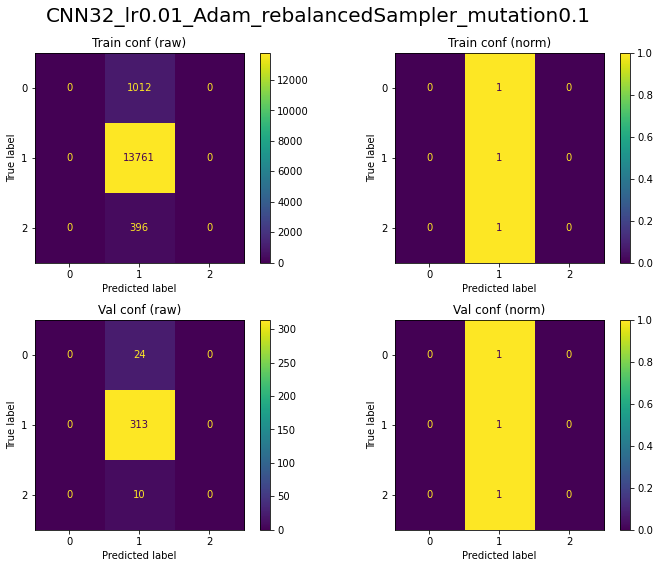

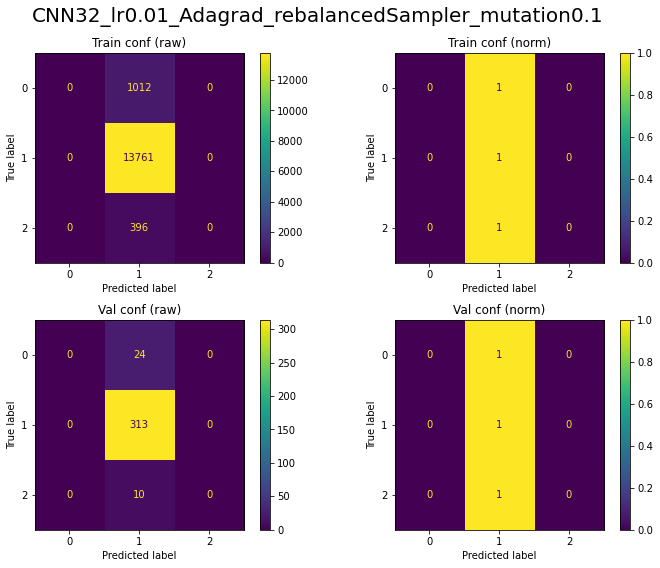

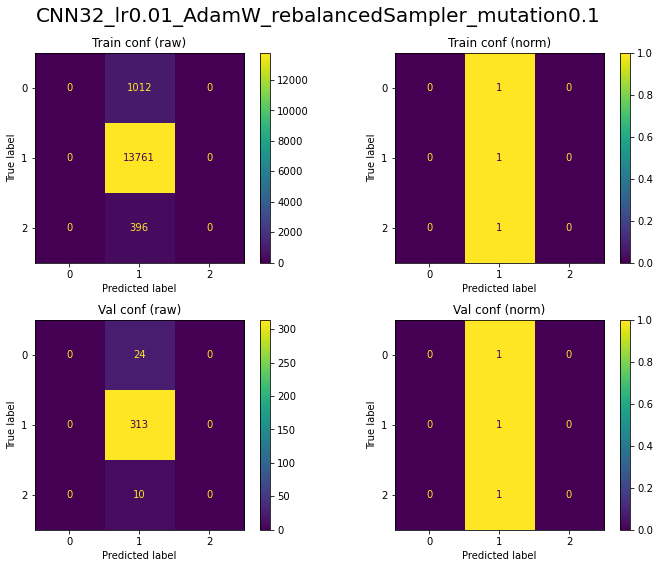

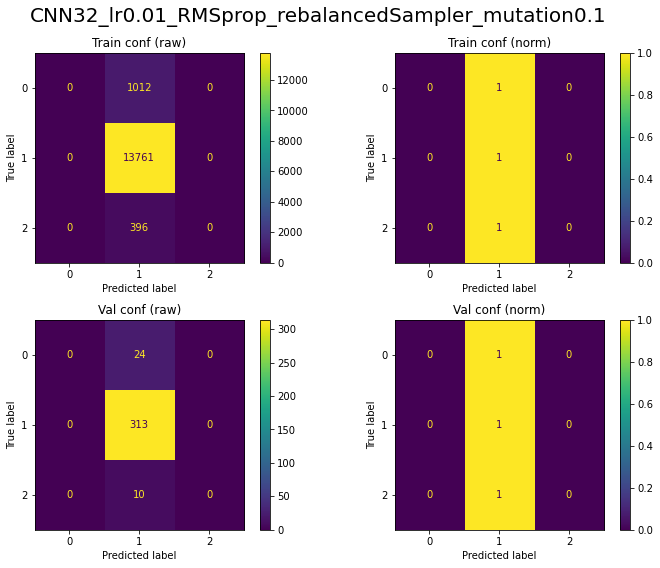

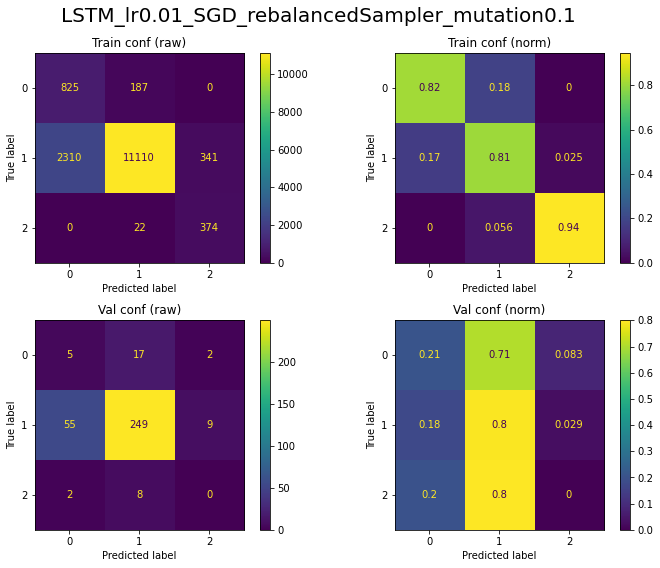

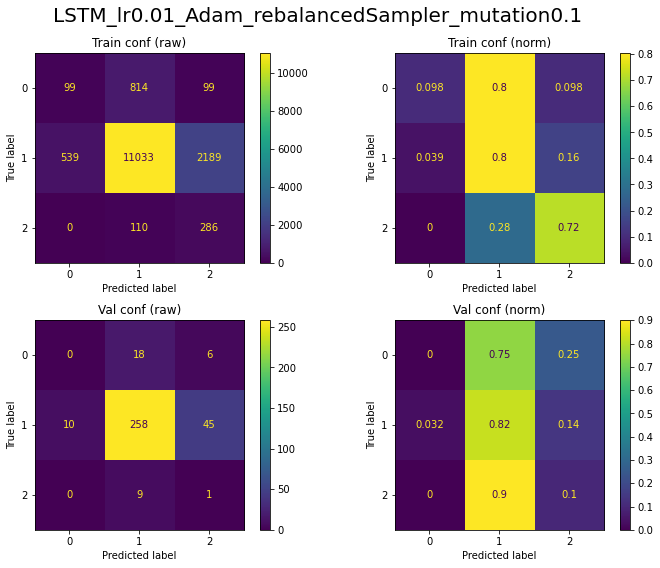

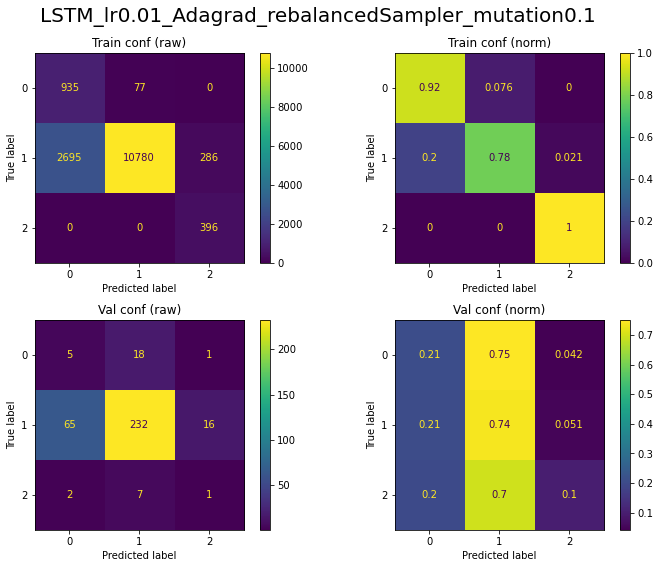

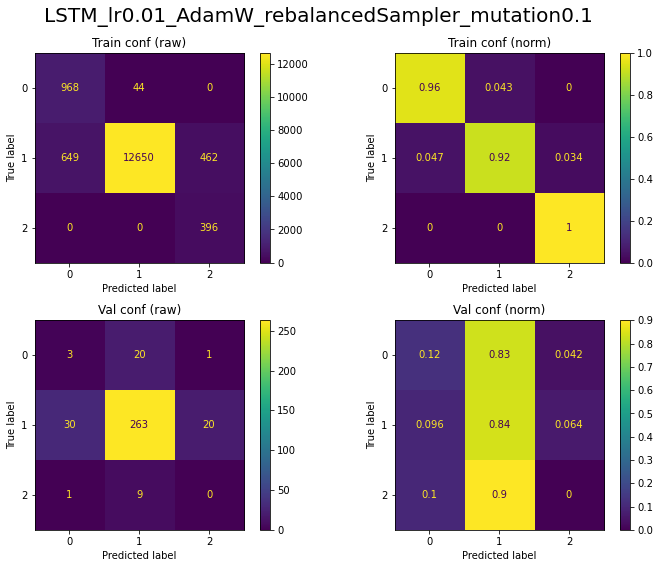

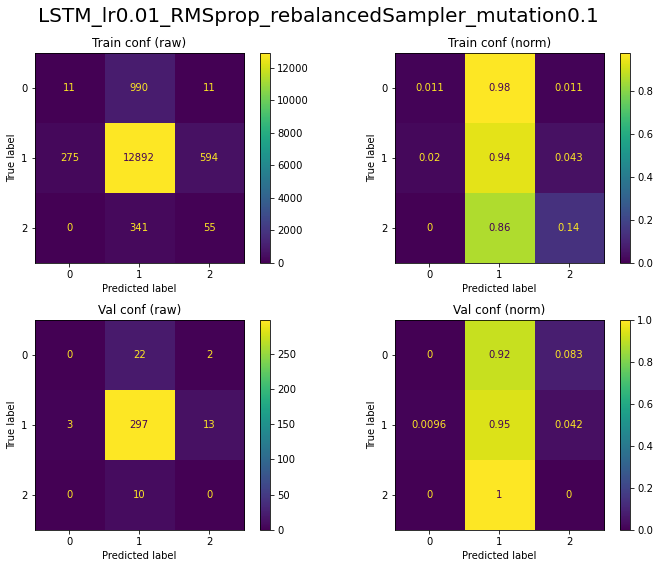

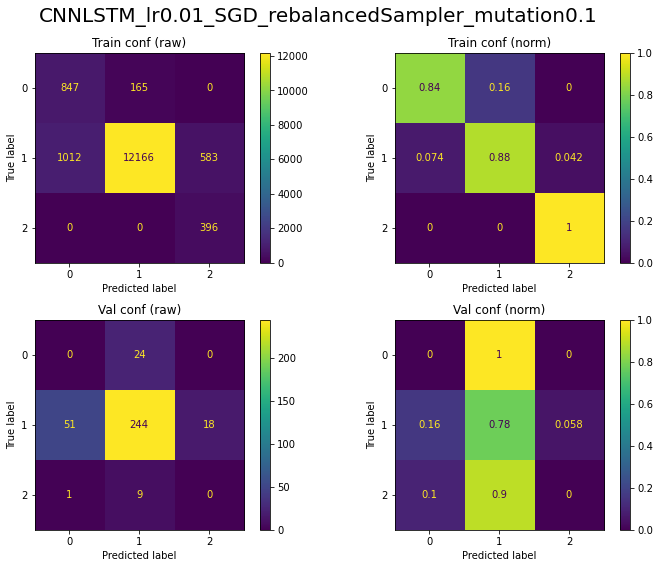

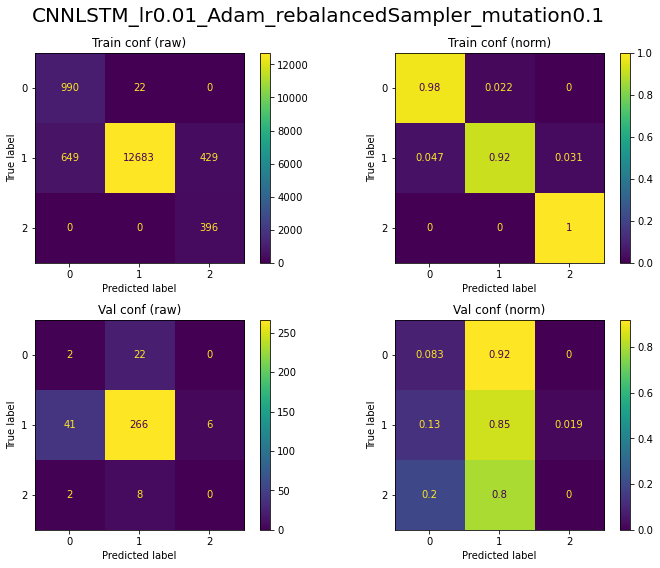

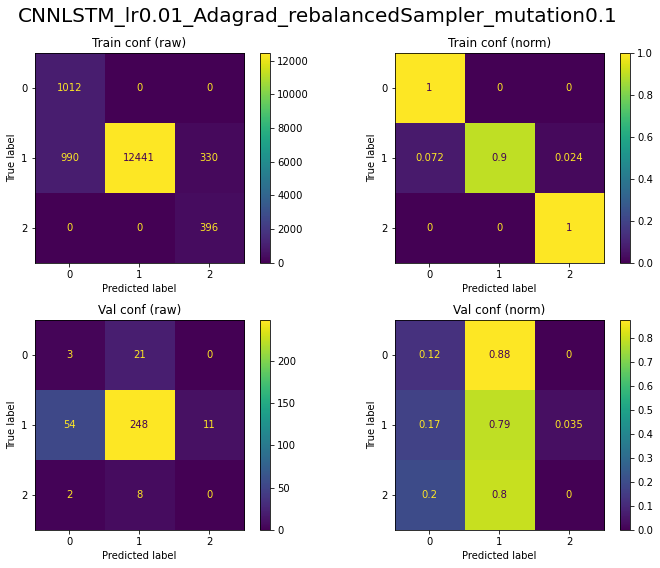

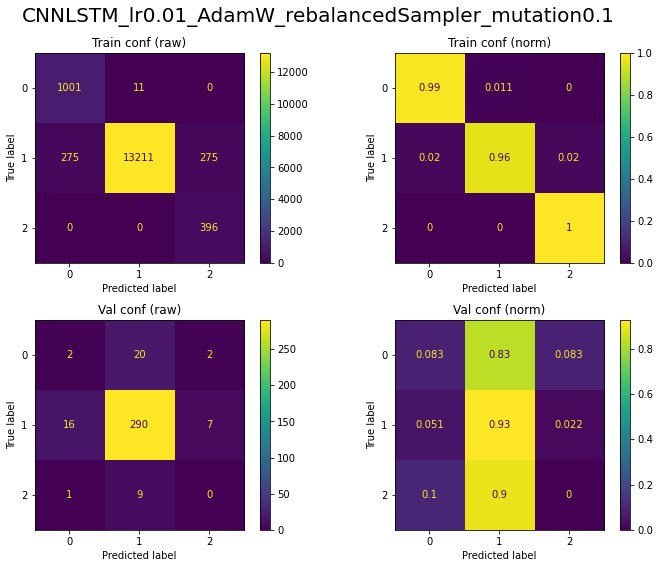

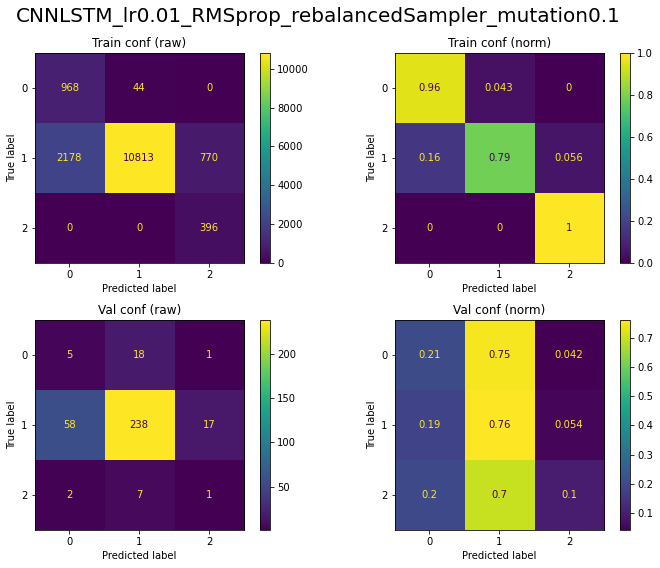

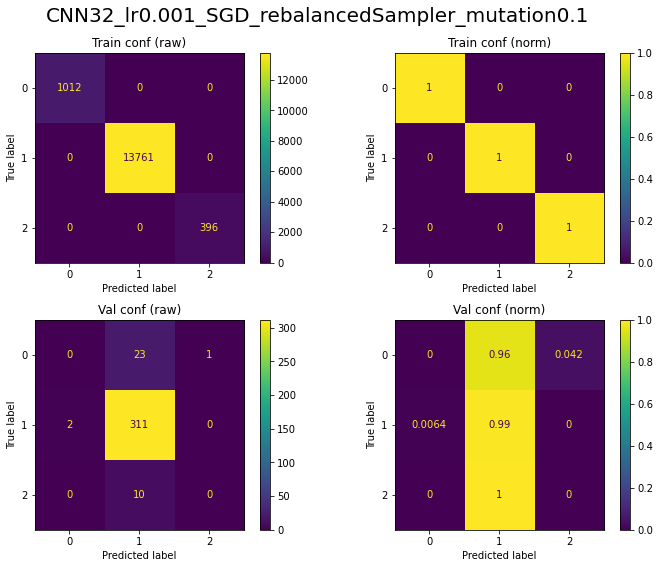

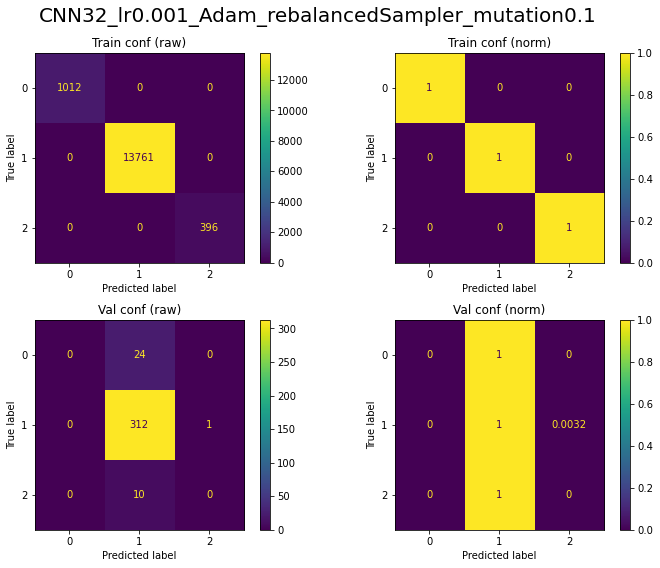

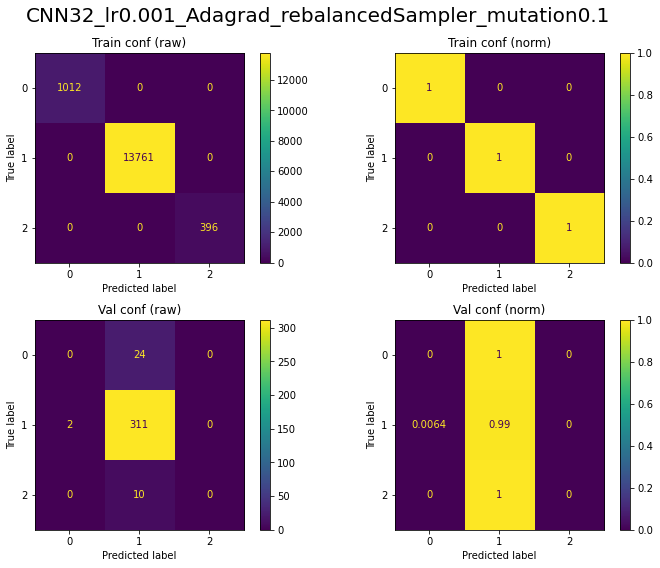

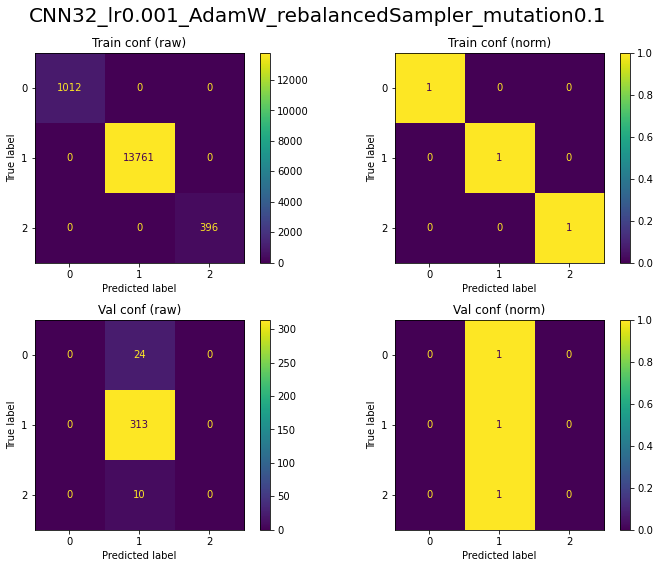

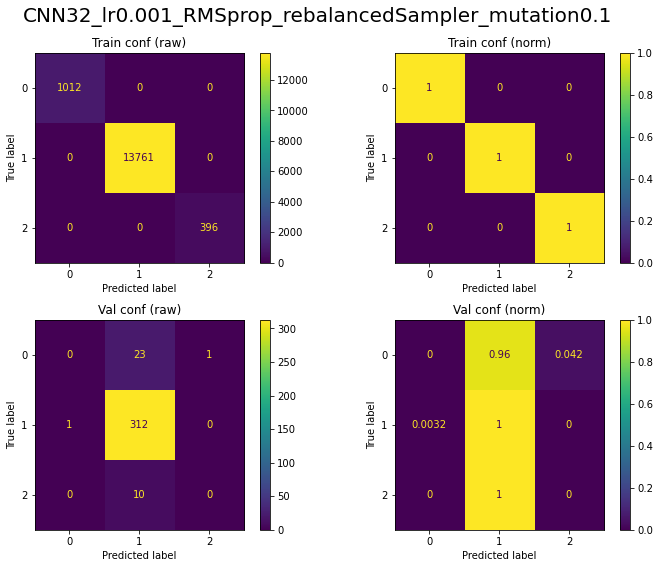

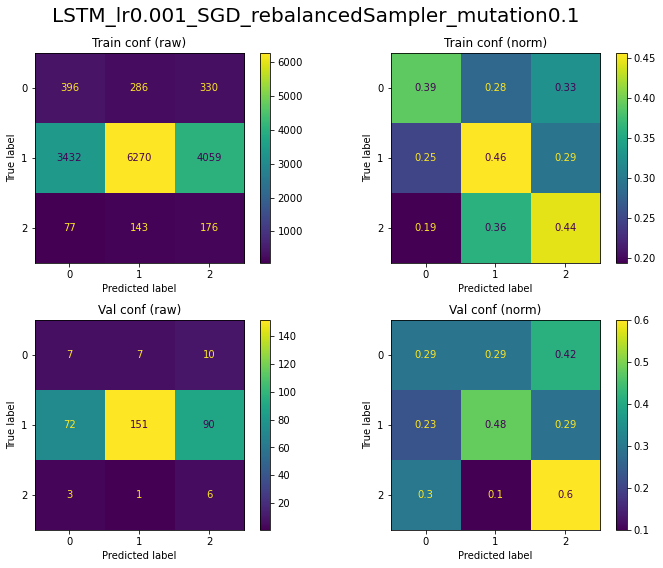

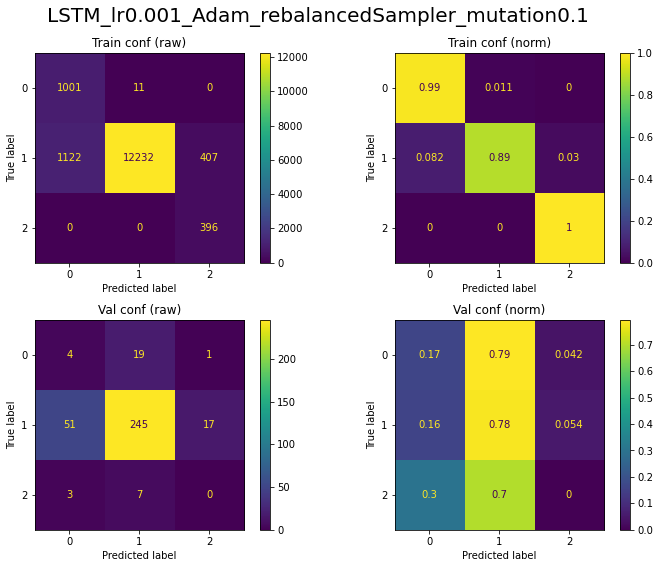

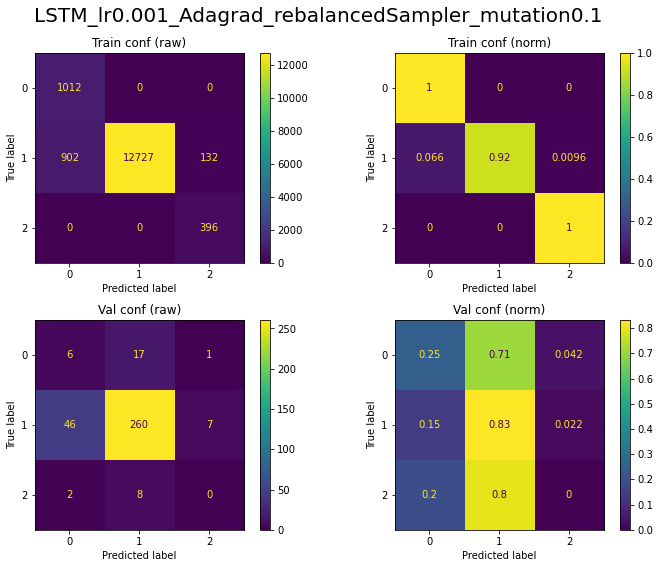

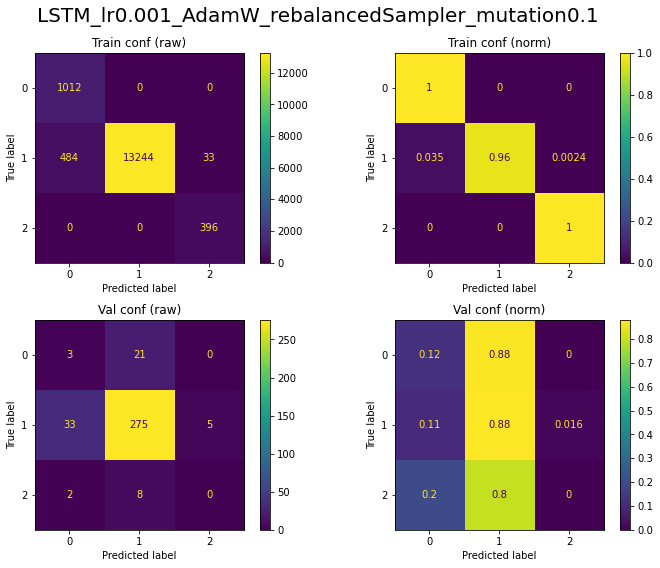

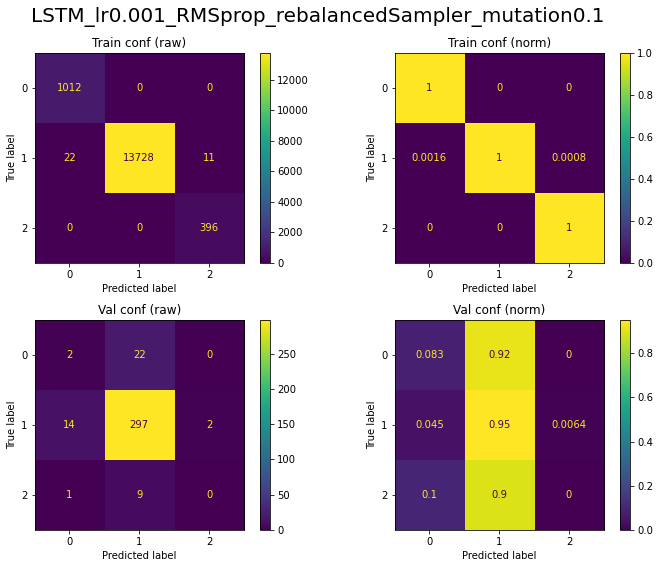

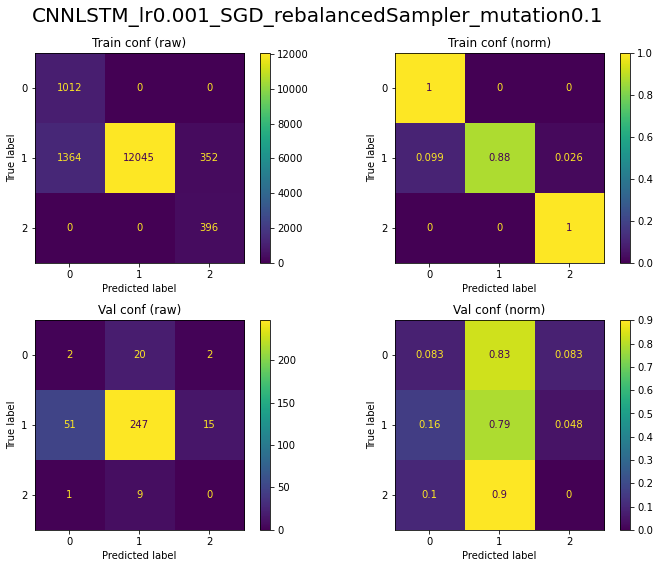

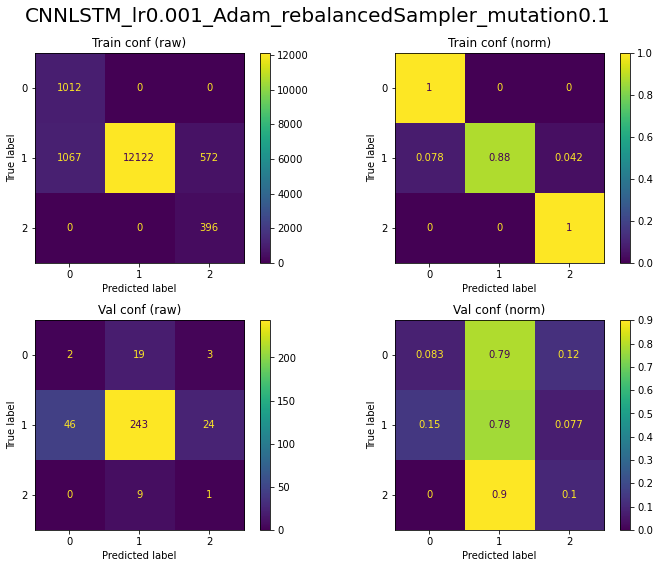

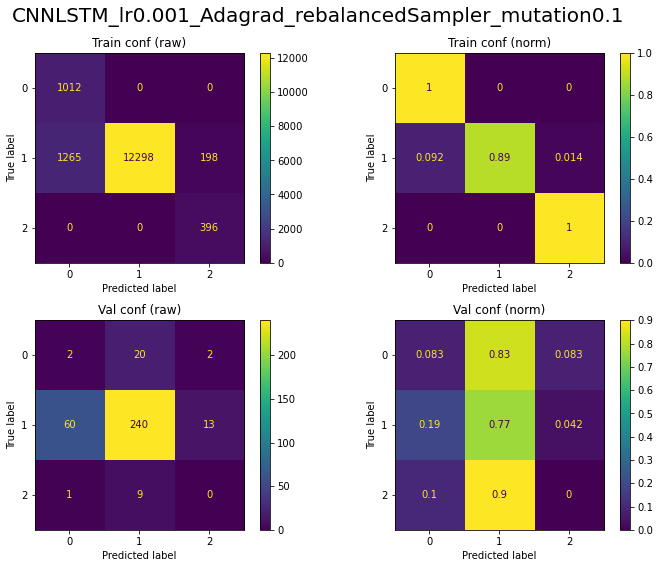

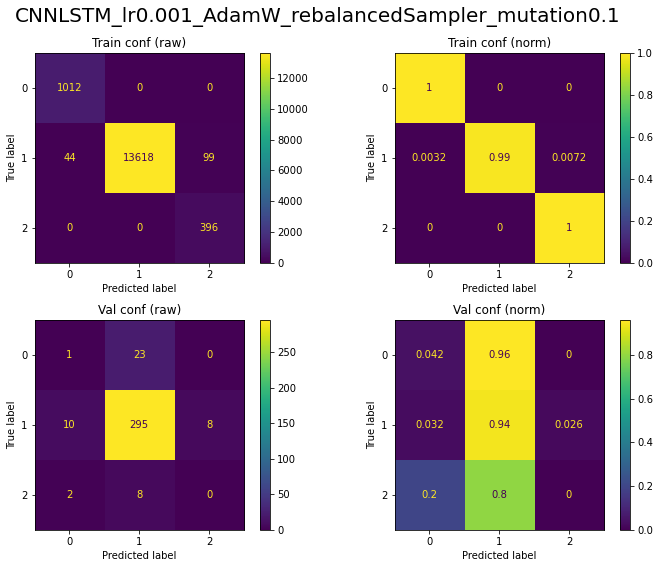

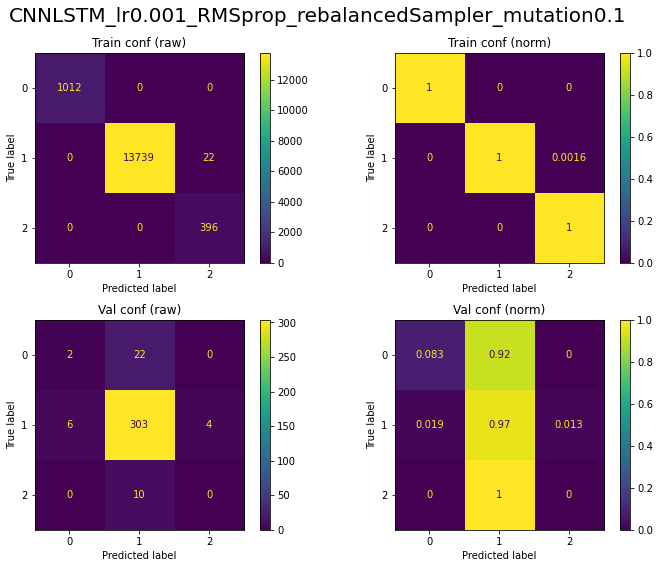

In [44]:
for m in loss_dict.keys():
    train_f = f'pipe2/conf_dfs/{m}_train_conf_df.tsv'
    val_f = f'pipe2/conf_dfs/{m}_val_conf_df.tsv'
    train_df = pd.read_csv(train_f,sep='\t')
    val_df = pd.read_csv(val_f,sep='\t')
    
    dfs = [(train_df,"Train"),(val_df,"Val")]
    plot_conf_matrix_paired(dfs, m)

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


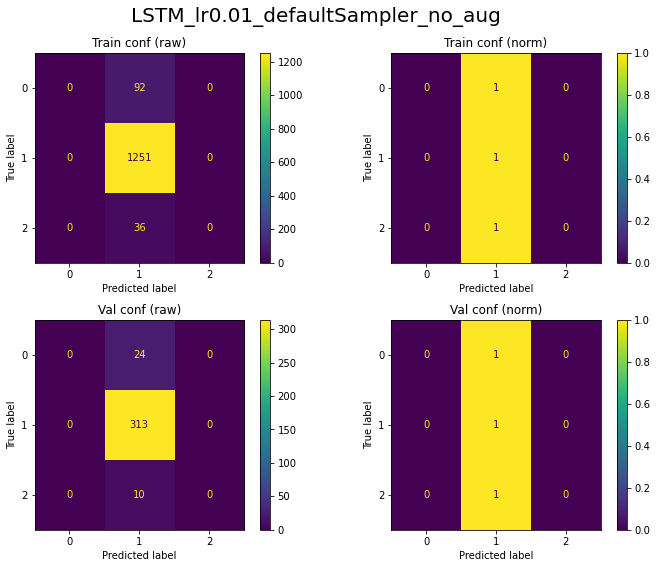

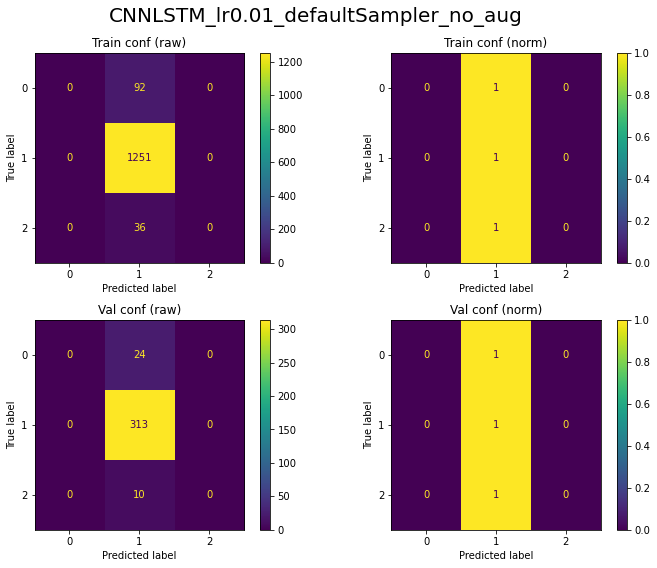

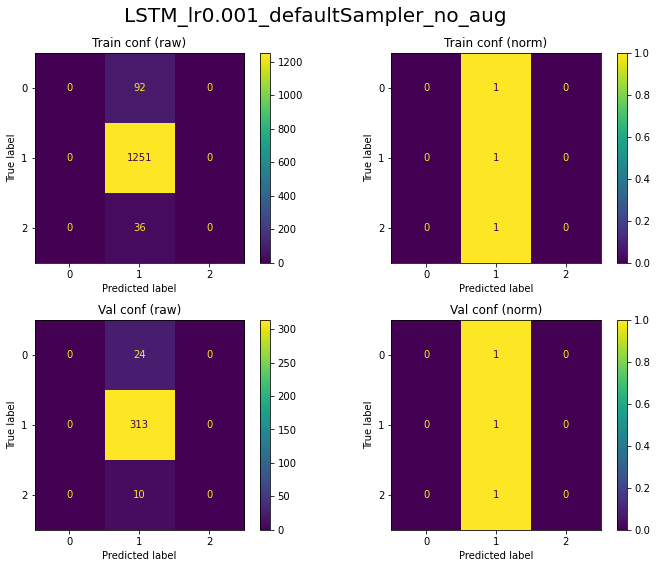

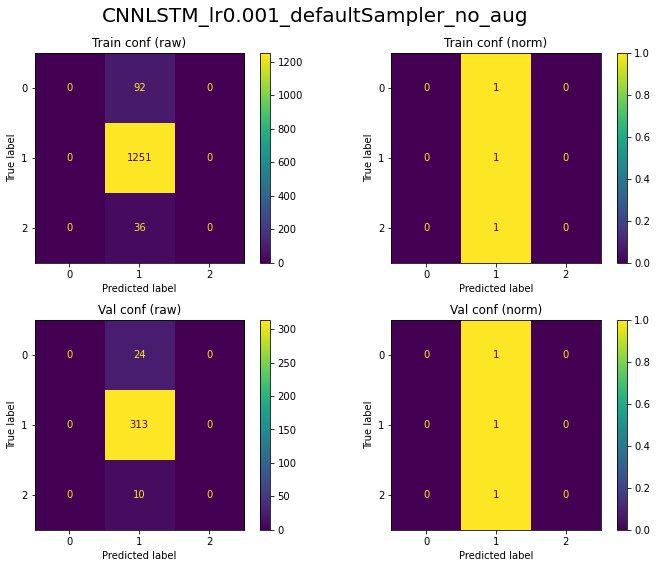

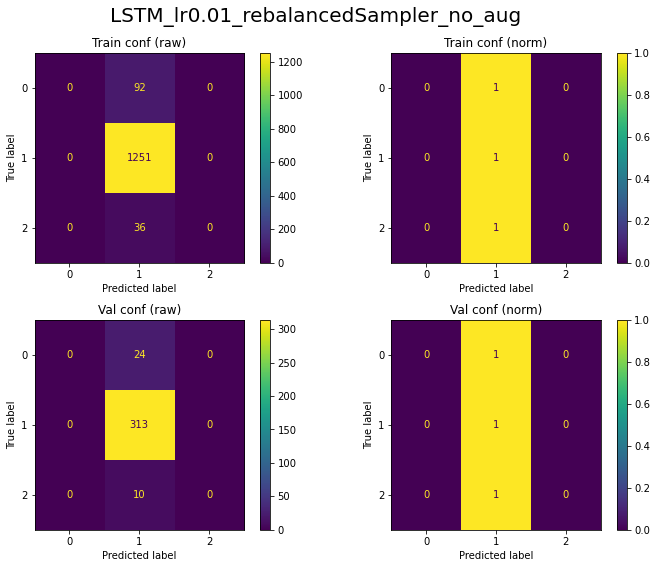

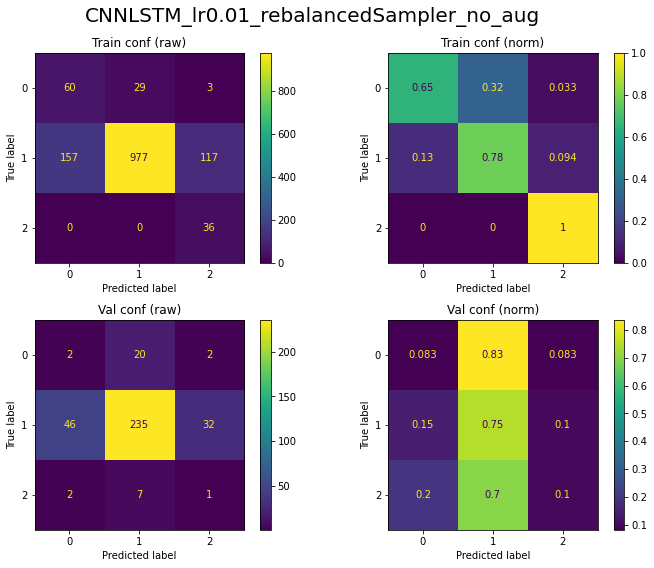

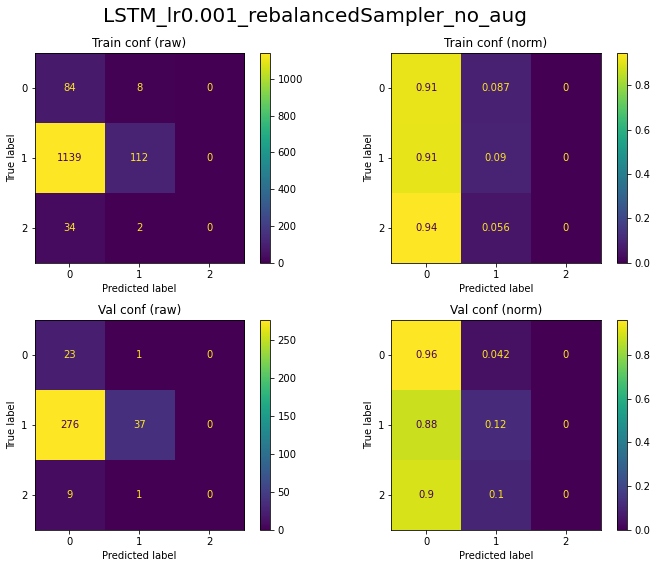

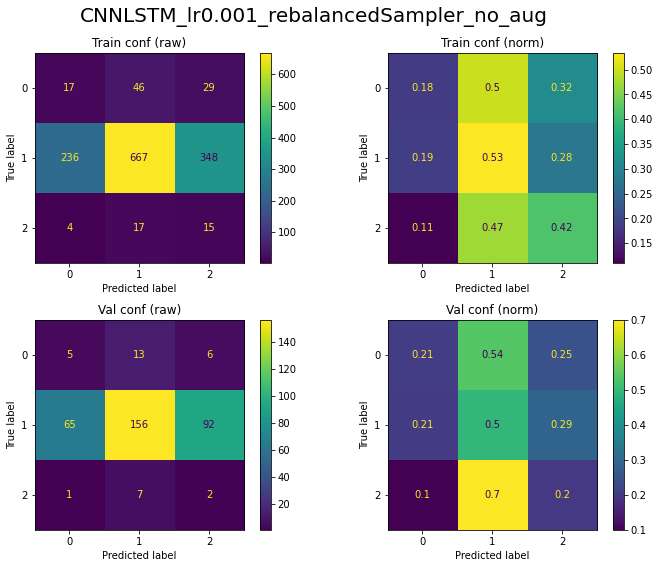

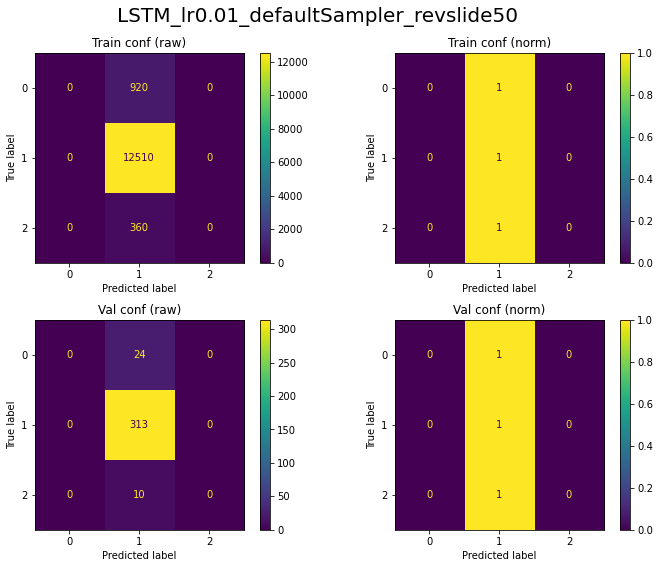

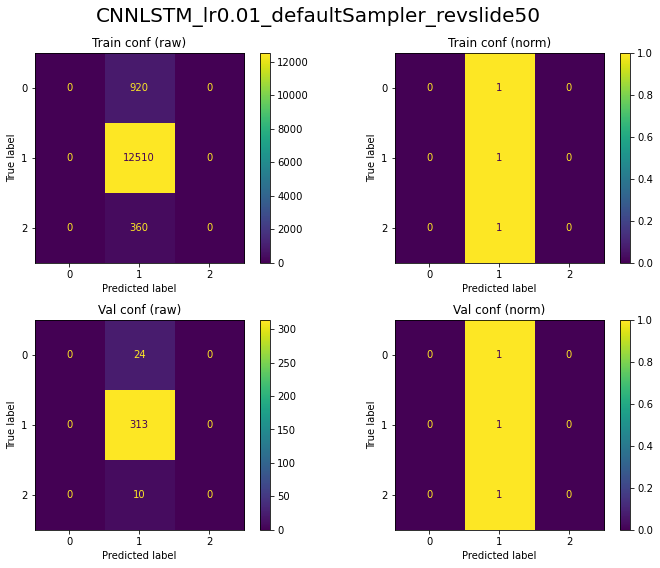

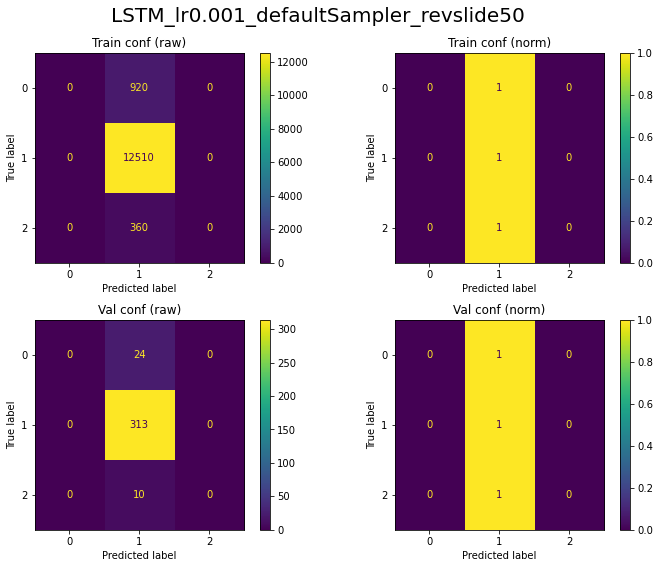

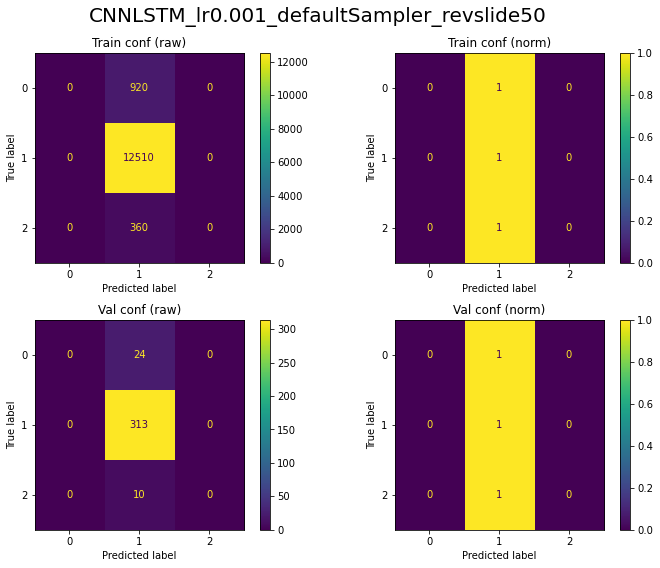

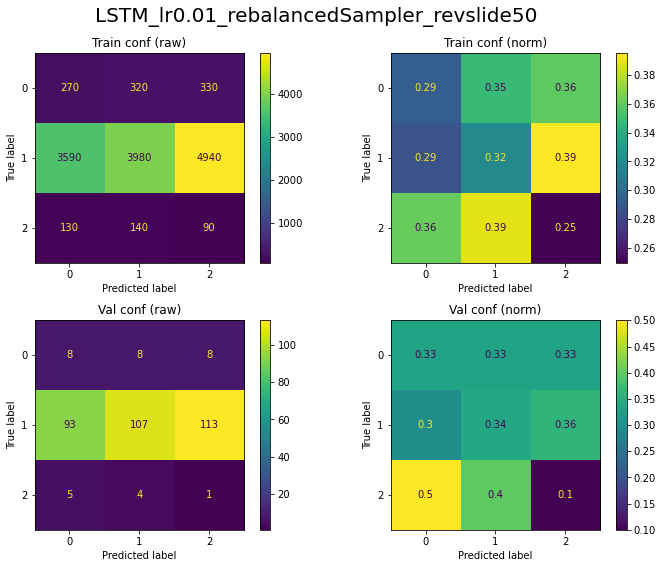

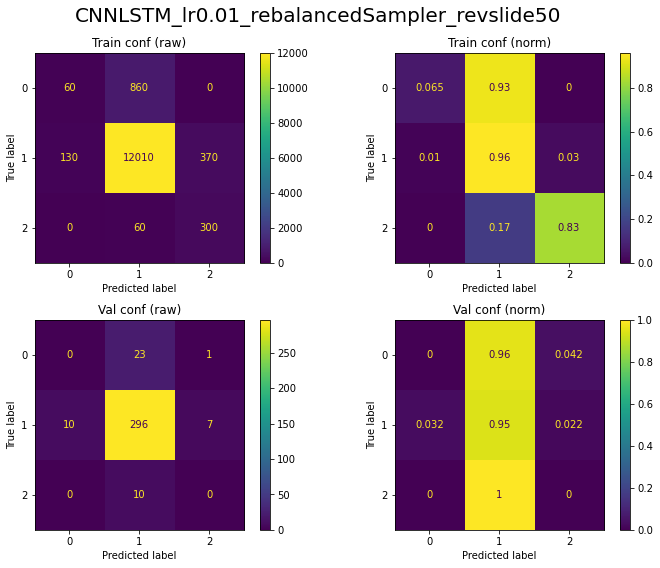

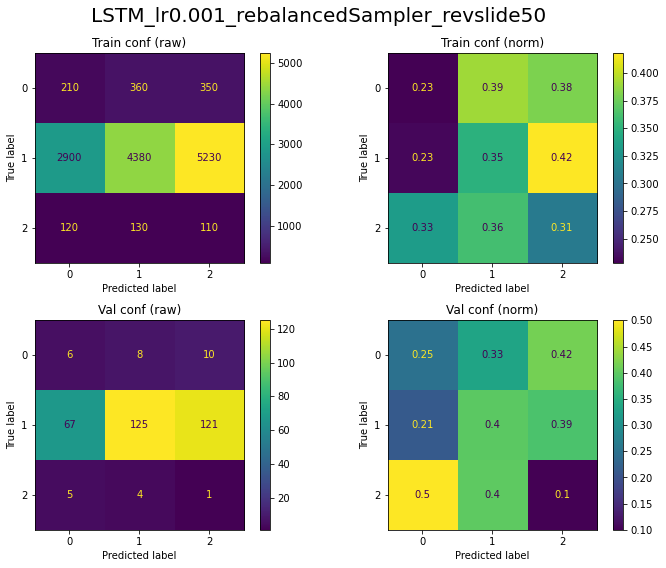

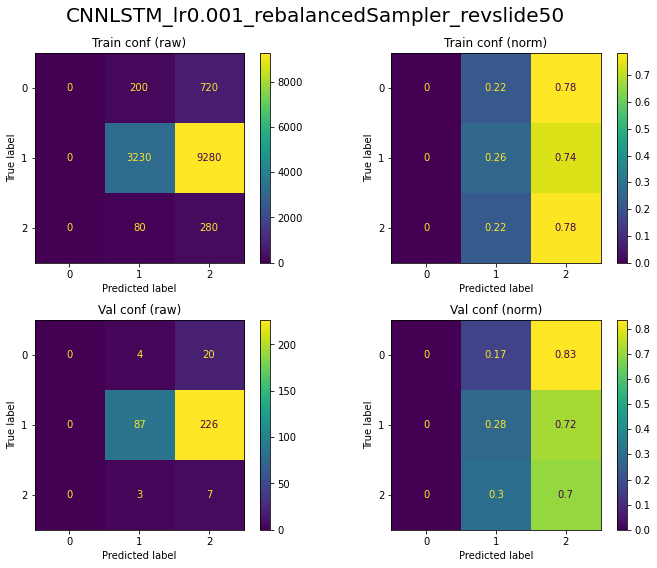

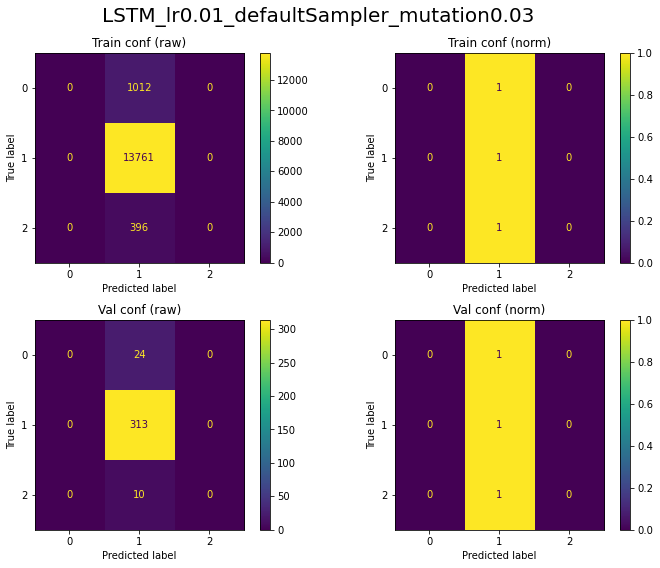

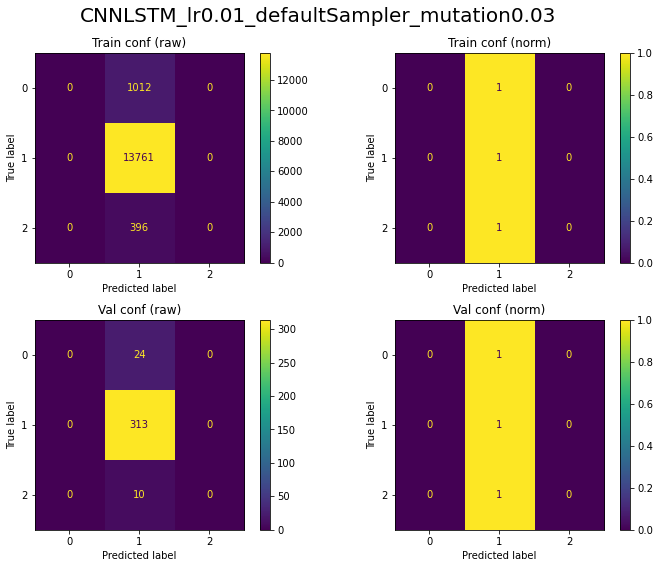

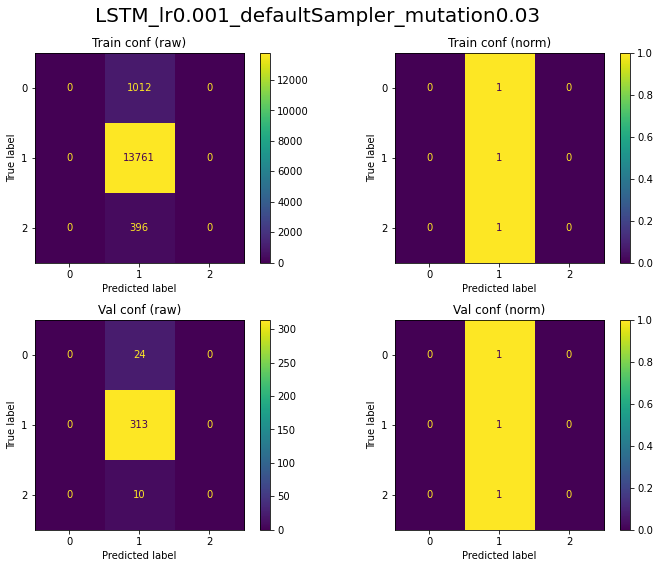

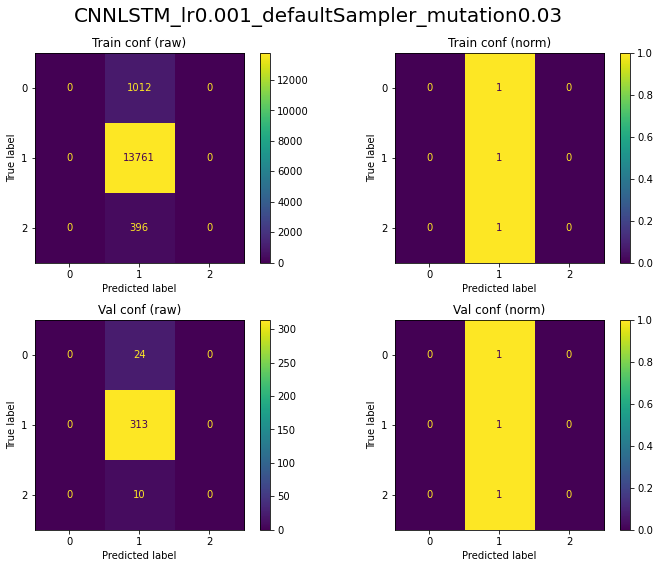

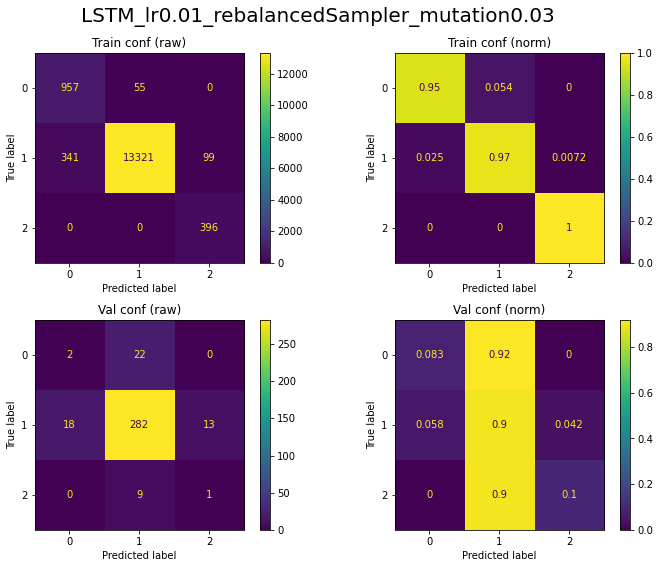

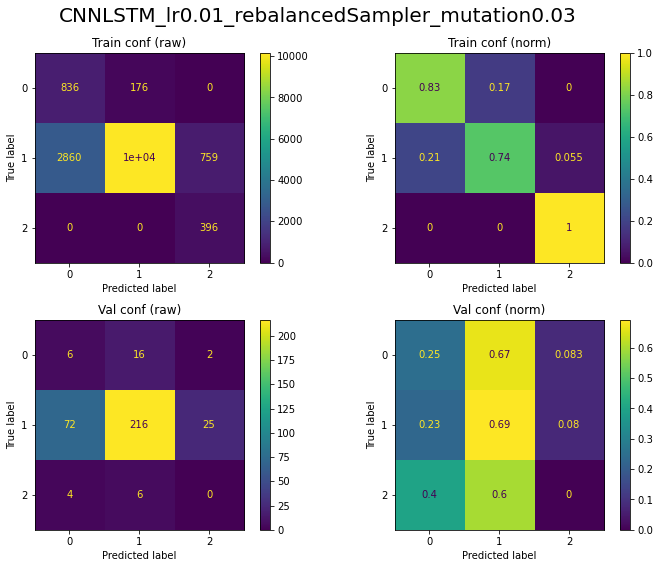

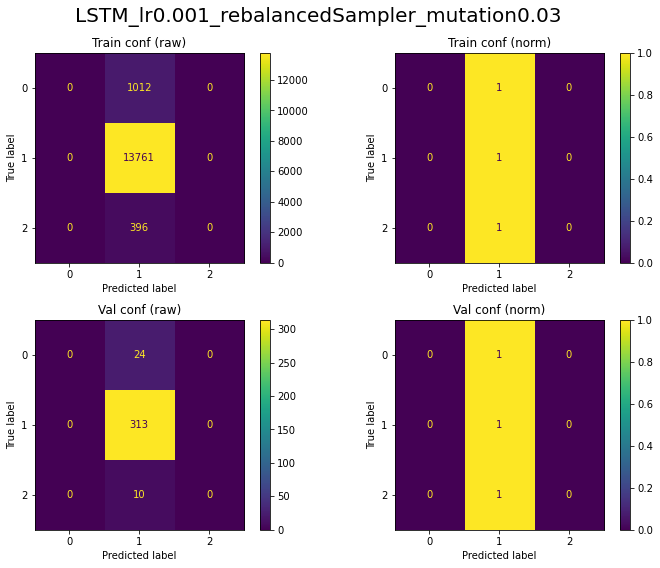

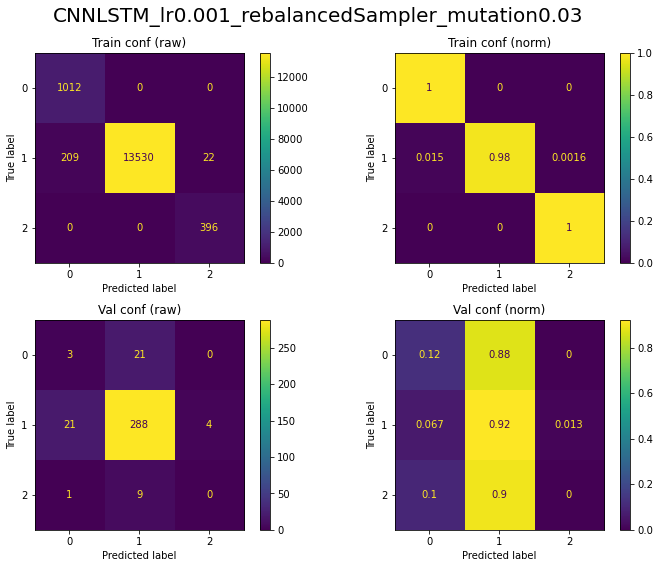

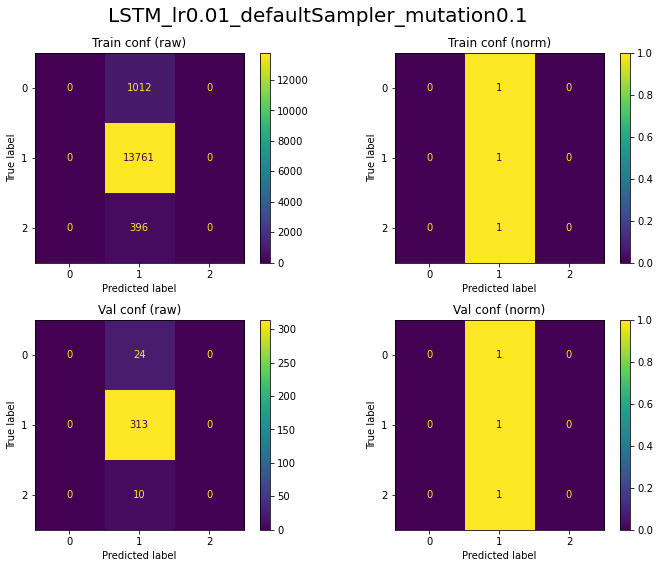

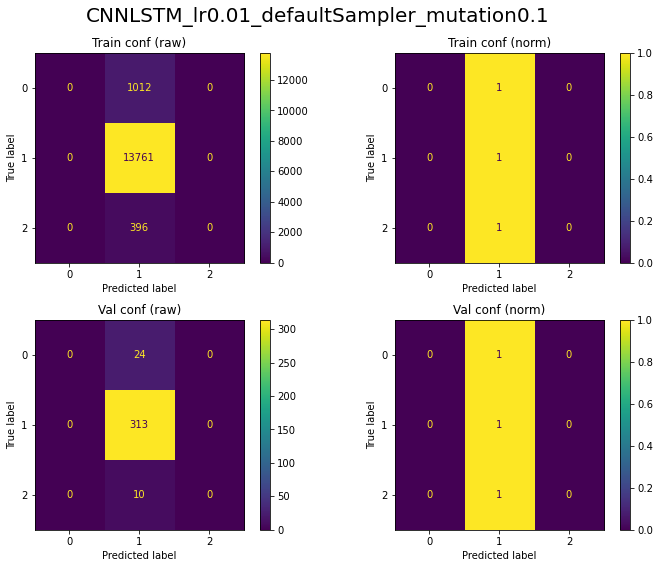

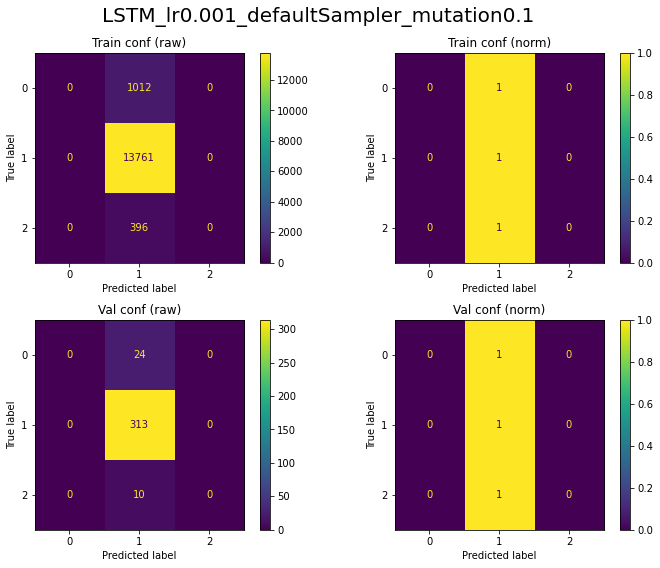

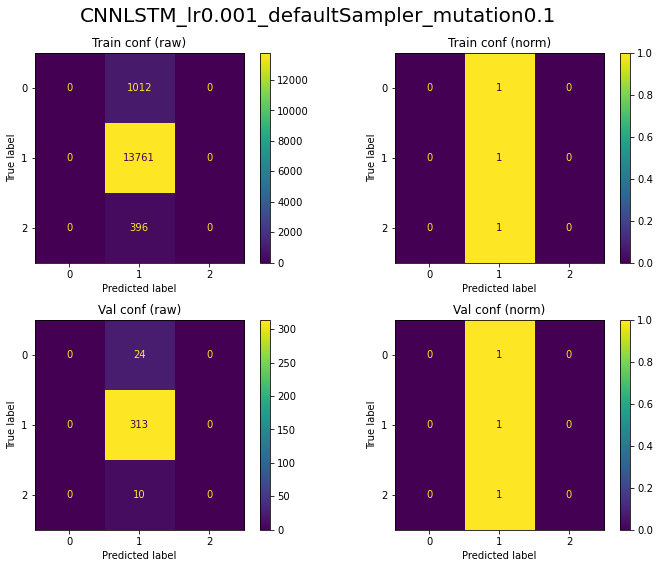

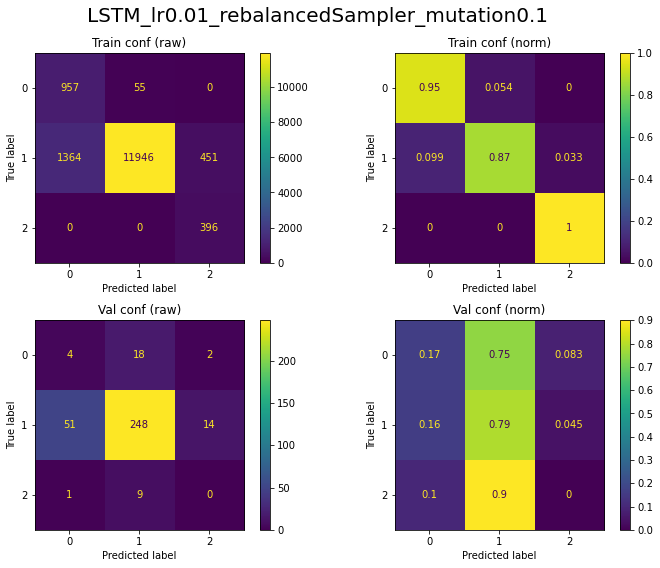

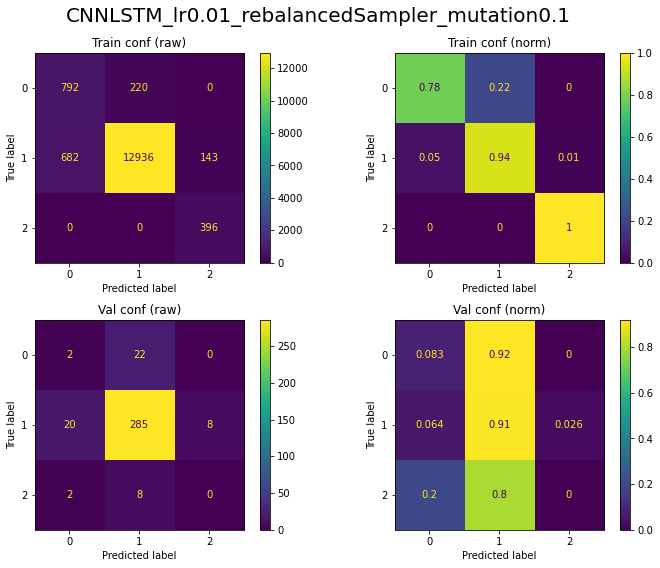

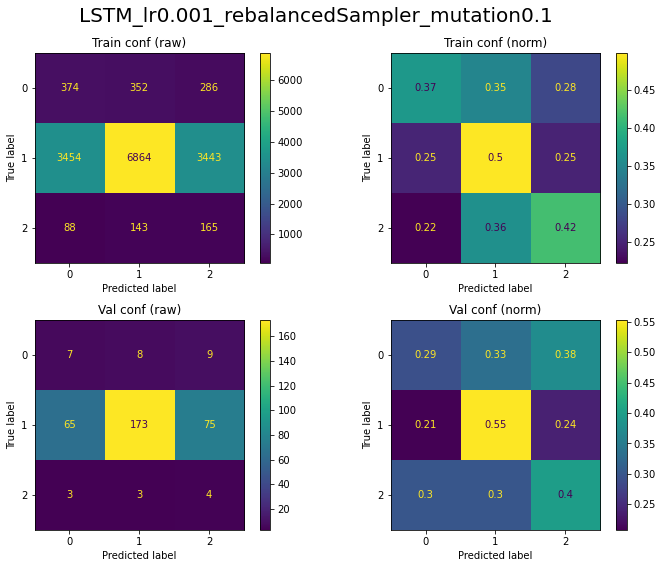

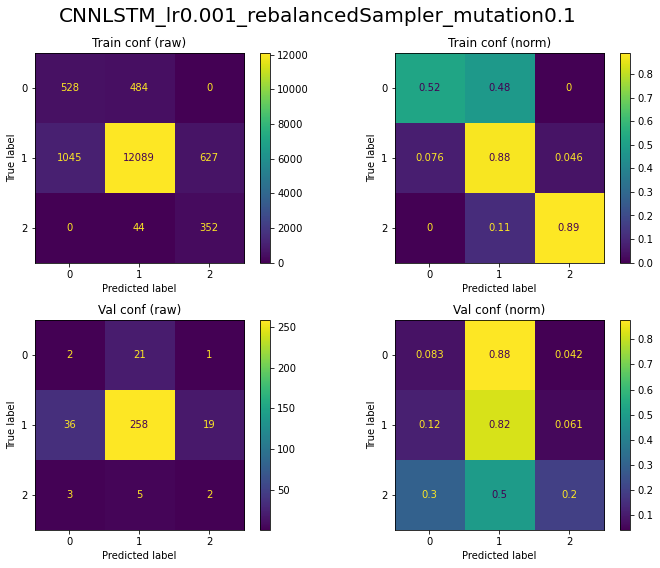

In [168]:
for m in loss_dict2.keys():
    train_f = f'pipe1/conf_dfs/{m}_train_conf_df.tsv'
    val_f = f'pipe1/conf_dfs/{m}_val_conf_df.tsv'
    train_df = pd.read_csv(train_f,sep='\t')
    val_df = pd.read_csv(val_f,sep='\t')
    
    dfs = [(train_df,"Train"),(val_df,"Val")]
    plot_conf_matrix_paired(dfs, m)

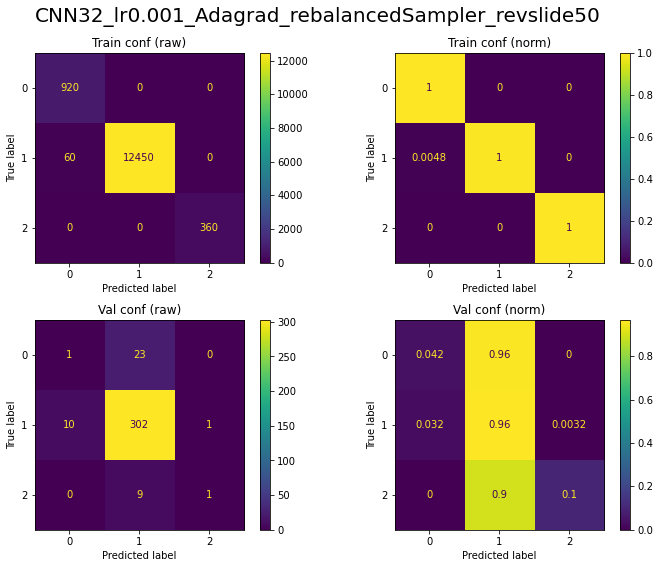

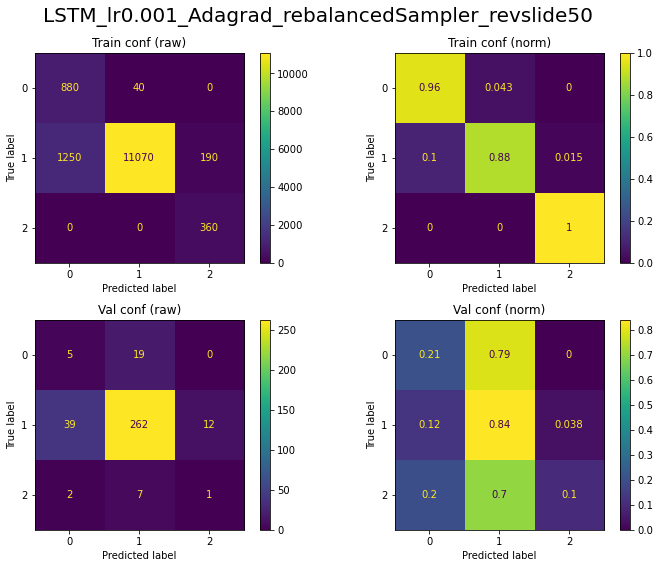

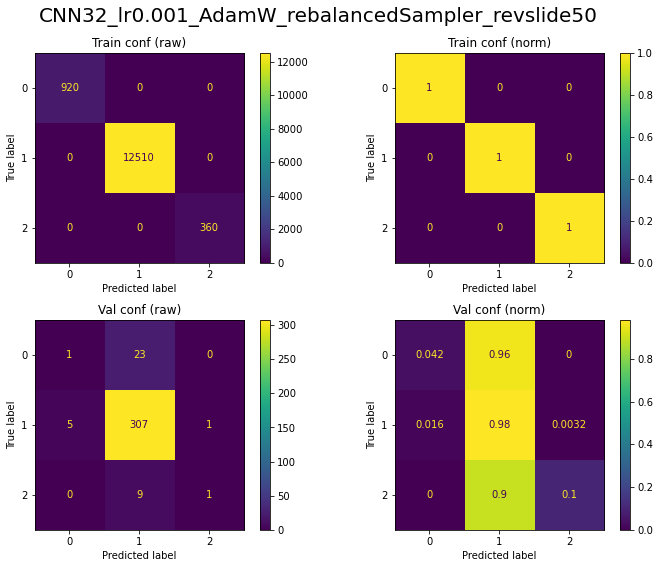

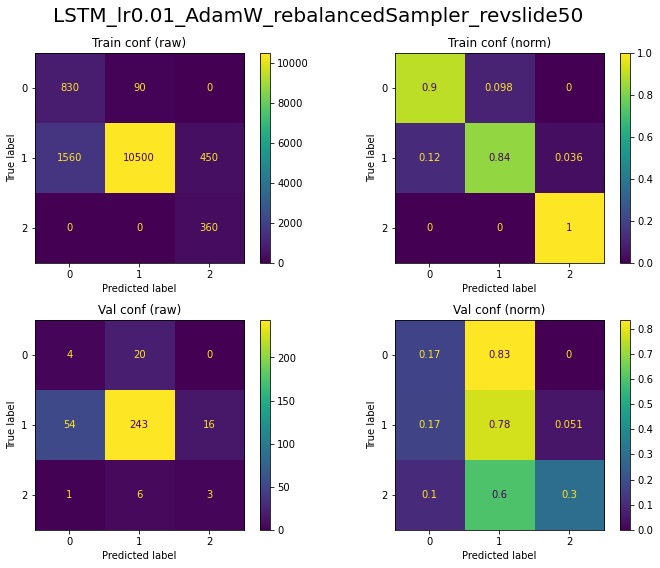

In [45]:
check = ['CNN32_lr0.001_Adagrad_rebalancedSampler_revslide50','LSTM_lr0.001_Adagrad_rebalancedSampler_revslide50','CNN32_lr0.001_AdamW_rebalancedSampler_revslide50','LSTM_lr0.01_AdamW_rebalancedSampler_revslide50']
for m in check:
    train_f = f'pipe2/conf_dfs/{m}_train_conf_df.tsv'
    val_f = f'pipe2/conf_dfs/{m}_val_conf_df.tsv'
    train_df = pd.read_csv(train_f,sep='\t')
    val_df = pd.read_csv(val_f,sep='\t')
    
    dfs = [(train_df,"Train"),(val_df,"Val")]
    plot_conf_matrix_paired(dfs, m)